## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline 

In [3]:
# import os
# os.chdir('/kaggle/working')
# os.getcwd()
# print(os.listdir("../input"))

##  Datasets to be studied
 I) Confirmed Cases Dataset of COVID-19
 
 II) Death Cases Dataset of COVID-19
 
 III) Recovered Cases Dataset of COVID-19
 
 IV)Testing Dataset of COVID-19
 
 V) INFORM Risk Index dataset

###  Confirmed Cases of COVID-19 

#### Reading data from the Source and dropping not required columns

In [4]:
# Importing  Confirmed Cases Dataset
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed = pd.read_csv(url_confirmed, index_col="Country/Region")
# df_confirmed = pd.read_csv("../input/covid19time-series-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
#                           header = 0, index_col="Country/Region")
df_confirmed.drop(['Lat', 'Long' ], axis=1, inplace=True)
df_confirmed.head(3)


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054
Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1

#### Data Preprocessing for the dataset I

In [5]:
# Country grouping on original dataframe        
gr_confirmed = df_confirmed.groupby("Country/Region").sum()
gr_confirmed.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981,36036,36157,36263,36368,36471,36542,36675,36710,36710,36747,36782,36829,36896,37015,37054,37054,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570,4637,4763,4880,4997,5105,5197,5276,5396,5519,5620,5750,5889,6016,6151,6275,6411,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418

In [6]:
gr_confirmed.loc[["Australia"]]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,30,39,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1549,1682,2044,2364,2810,3143,3640,3984,4361,4559,4862,5116,5330,5550,5687,5797,5895,6010,6108,6215,6303,6315,6351,6415,6440,6462,6522,6568,6610,6623,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766,6778,6799,6822,6847,6875,6894,6913,6918,6939,6948,6970,6980,6989,7019,7035,7044,7054,7068,7072,7081,7095,7099,7114,7114,7126,7139,7150,7165,7184,7192,7202,7221,7229,7240,7247,7252,7259,7265,7267,7274,7285,7289,7294,7320,7335,7347,7370,7391,7409,7411,7461,7474,7492,7521,7558,7595,7601,7686,7764,7834,7920,8001,8066,8260,8443,8583,8755,8886,9056,9374,9553,9797,9980,10251,10487,10810,11233,11441,11802,12069,12428,12894,13302,13595,13950,14403,14935,15303,15582,16298,16903,17280,17895,18318,18730,19445,19890,20272,20698,21084,21397,21713,22127,22358,22742,23035,23287,23558,23773,23989,24236,24407,24602,24811,24915,25053


In [7]:
# Checking for the missing values in the Confirmed Cases dataset

gr_confirmed.isnull().sum().sum()
gr_confirmed.isna().sum().sum()

# Hence, there are no missing values in our Confirmed Cases data. 

0

#### Shifting all data to one starting point & converting the Dates format to Days

Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 10 

In [8]:
# Adding data for China (1-Jan to 21-Jan from a China CDC publication)
lab=[]
for i in range(1,22):
    lab.append("1/" + str(i) + "/20")
    gr_confirmed.insert(loc=i-1,column=lab[i-1], value=0)
gr_confirmed.loc["China"][0:10] = 20
gr_confirmed.loc["China"][10:21] = 310

# Remove Diamond princess and MS Zaandam
gr_confirmed = gr_confirmed.drop(["Diamond Princess", "MS Zaandam"])
# gr_confirmed.head(3)

# Keeping Copy of gr_confirmed in its current format in dates format 
gr_confirmed1= gr_confirmed.copy() 
gr_confirmed1 = gr_confirmed1.reset_index()


# Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
gr_confirmed_melt = gr_confirmed
dates = gr_confirmed_melt.keys()
FMT = '%m/%d/%y'

days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("1/1/20", FMT)).days)

days = days + 1
# +1 is to start the days from 1 instead of 0

gr_confirmed_melt.columns = days # = dates will convert the columns to date formats again

x_lag = gr_confirmed_melt.ge(10).idxmax(axis=1) # x_lag gives position of first value in each row which is greater than or equal to 10

for i in range(gr_confirmed_melt.shape[0]): # gr_confirmed_melt.shape[0] = 187 (no. of rows) and gr_confirmed_melt.shape[1] = 138 (no. of columns)
    gr_confirmed_melt.iloc[i] = gr_confirmed_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
# gr_confirmed_melt.head(3)

# Melting our Confirmed Cases dataset
gr_confirmed_melt = gr_confirmed_melt.reset_index()
gr_confirmed_melt = pd.melt(gr_confirmed_melt,id_vars= "Country/Region", 
                       value_vars=days, var_name="Days", 
                       value_name="Cumulative Confirmed Count").sort_values(["Country/Region","Days"])

gr_confirmed_melt.set_index("Country/Region", inplace = True)
gr_confirmed_melt.head(5)

,Days,Cumulative Confirmed Count
Country/Region,,
Afghanistan,1,11.0
Afghanistan,2,16.0
Afghanistan,3,21.0
Afghanistan,4,22.0
Afghanistan,5,22.0


### Deaths due to COVID-19 

#### Reading data from the source and removing not required columns

In [9]:
# Importing Deaths Dataset
url_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_death = pd.read_csv(url_death, index_col="Country/Region")
# df_death = pd.read_csv('../input/covid19time-series-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv', 
#                        header = 0, index_col="Country/Region")
df_death.drop(['Lat', 'Long'], axis=1, inplace=True)
df_death.head(3)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389
Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861,869,878,885,892,897,905,912,920,928,937,946,952,959,968,978,988,996,1004,1011,1018,1028,1040,1052,1057,1068,1078,1087,1100,1111,1124,1136,1146,1155,1163,1174,1186,1200,1210,1223,1231,1239,1248,1261,1273,1282,12

#### Data Preprocessing 

In [10]:
# Country grouping on original dataframe        
gr_death = df_death.groupby("Country/Region").sum()
gr_death.head(3)

# # Now adding Australian dataframe
# gr_death = pd.concat([gr_death, Aust_death])

# Adding data for China (1-Jan to 20-Jan) 
lab=[]
for i in range(1,22):
    lab.append("1/" + str(i) + "/20")
    gr_death.insert(i-1,lab[i-1],0)
gr_death.loc["China"][0:10] = 1
gr_death.loc["China"][10:21] = 1

# Remove Diamond princess
gr_death = gr_death.drop(["Diamond Princess", "MS Zaandam"])
# gr_death.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/Deaths.csv")

# Keeping Copy of gr_death in its current format in dates format 
gr_death1 = gr_death.copy() 
gr_death1 = gr_death1.reset_index()
gr_death.head(3)

,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618,639,675,683,703,721,733,746,774,807,819,826,864,898,920,936,957,971,994,1010,1012,1048,1094,1113,1147,1164,1181,1185,1186,1190,1211,1225,1248,1259,1269,1270,1271,1271,1272,1283,1284,1288,1288,1294,1298,1307,1312,1312,1328,1344,1354,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45,47,49,51,53,55,58,62,65,69,72,74,76,79,81,83,83,85,89,93,95,97,101,104,107,111,112,113,117,120,123,128,134,138,144,148,150,154,157,161,166,172,176,182,188,189,193,199,200,205,208,213,219,225,228,230,232,234,238,240,245,250,254
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,

In [11]:
# Checking for the missing values in the death Cases dataset

gr_death.isnull().sum().sum()
gr_death.isna().sum().sum()

# Hence, there are no missing values in our death Cases data. 

0

#### Shifting all data to one starting point & converting the Dates format to Days
Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 10 

In [12]:
# Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
gr_death_melt = gr_death
dates = gr_death_melt.keys()
FMT = '%m/%d/%y'

days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("1/1/20", FMT)).days)
days = days + 1
# +1 is to start the days from 1 instead of 0

gr_death_melt.columns = days # = dates will convert the columns to date formats again

x_lag  # x_lag gives position of first value in each row which is greater than or equal to 10 in confirmed cases dataset

for i in range(gr_death_melt.shape[0]): # gr_death_melt.shape[0] = 187 (no. of rows) and gr_death_melt.shape[1] = 138 (no. of columns)
    gr_death_melt.iloc[i] = gr_death_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
# gr_death_melt.head(3)

# Melting our Death cases dataset
gr_death_melt = gr_death_melt.reset_index()
gr_death_melt = pd.melt(gr_death_melt,id_vars= "Country/Region", 
                       value_vars=days, var_name="Days", 
                       value_name="Cumulative Death Count").sort_values(["Country/Region","Days"])

gr_death_melt.set_index("Country/Region", inplace = True)
gr_death_melt.head(5)

,Days,Cumulative Death Count
Country/Region,,
Afghanistan,1,0.0
Afghanistan,2,0.0
Afghanistan,3,0.0
Afghanistan,4,0.0
Afghanistan,5,0.0


### Recovered Cases of COVID-19

#### Reading data from the source and dropping not required columns

In [13]:
# Importing dataset for Recovered Cases
url_recovered = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_recovered = pd.read_csv(url_recovered, index_col="Country/Region")
# df_recovered = pd.read_csv("../input/covid19time-series-data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",
#                            header = 0, index_col="Country/Region")

df_recovered.drop(['Lat', 'Long'], axis=1, inplace=True)
df_recovered.head(3)


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360
Albania,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413
Algeria,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,12,12,12,12,12,32,32,32,65,65,24,65,29,29,31,31,37,46,61,61,62,90,90,90,113,237,347,405,460,591,601,691,708,783,846,894,1047,1099,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968

#### Data Prepocessing 

In [14]:
# Country grouping on original dataframe        
gr_recovered = df_recovered.groupby("Country/Region").sum()

# Adding data for China (1-Jan to 20-Jan) 
lab=[]
for i in range(1,22):
    lab.append("1/" + str(i) + "/20")
    gr_recovered.insert(i-1,lab[i-1],0)
gr_recovered.loc["China"][0:10] = 0
gr_recovered.loc["China"][10:21] = 0

# Remove Diamond princess
gr_recovered = gr_recovered.drop(["Diamond Princess", "MS Zaandam"])

# Keeping Copy of gr_recovered in its current format in dates format 
gr_recovered1 = gr_recovered.copy()  
gr_recovered1 = gr_recovered1.reset_index()
gr_recovered.head(3)

,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,1/9/20,1/10/20,1/11/20,1/12/20,1/13/20,1/14/20,1/15/20,1/16/20,1/17/20,1/18/20,1/19/20,1/20/20,1/21/20,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,5,5,10,10,10,15,18,18,29,32,32,32,32,32,40,43,54,99,112,131,135,150,166,179,188,188,207,220,228,252,260,310,331,345,397,421,458,468,472,502,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660,7962,8292,8764,8841,9260,9869,10174,10306,10674,12604,13934,14131,15651,16041,17331,19164,19366,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456,22824,23151,23273,23634,23741,23741,23924,24550,24602,24793,25180,25198,25358,25389,25471,25509,25509,25510,25669,25669,25742,25840,25903,25960,25960,26228,26415,26694,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,10,17,17,31,31,33,44,52,67,76,89,99,104,116,131,154,165,182,197,217,232,248,251,277,283,302,314,327,345,356,385,394,403,410,422,431,455,470,488,519,531,543,570,595,605,620,627,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086,1114,1126,1134,1159,1195,1217,1250,1298,1346,1384,1438,1459,1516,1559,1592,1637,1657,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091,2137,2214,2264,2311,2352,2397,2463,2523,2608,2637,2682,2745,2789,2830,2883,2952,2961,3018,3031,3031,3123,3155,3227,3268,3342,3379,3480,3552,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,1

In [15]:
# Checking for the missing values in the Recovered Cases dataset

gr_recovered.isnull().sum().sum()
gr_recovered.isna().sum().sum()

# Hence, there are no missing values in our Recovered Cases data. 

0

#### Shifting all data to one starting point & converting the Dates format to Days
Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 10 

In [16]:
# Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
gr_recovered_melt = gr_recovered
dates = gr_recovered_melt.keys()
FMT = '%m/%d/%y'

days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("1/1/20", FMT)).days)

days = days + 1
# +1 is to start the days from 1 instead of 0

gr_recovered_melt.columns = days # = dates will convert the columns to date formats again

x_lag # x_lag gives position of first value in each row which is greater than or equal to 10 in confirmed cases data

for i in range(gr_recovered_melt.shape[0]): # gr_recovered_melt.shape[0] = 187 (no. of rows) and gr_recovered_melt.shape[1] = 138 (no. of columns)
    gr_recovered_melt.iloc[i] = gr_recovered_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
gr_recovered_melt.head(3)

# Melting our Recovered Cases dataset
gr_recovered_melt = gr_recovered_melt.reset_index()
gr_recovered_melt = pd.melt(gr_recovered_melt,id_vars= "Country/Region", 
                       value_vars=days, var_name="Days", 
                       value_name="Cumulative Recovered Count").sort_values(["Country/Region","Days"])

gr_recovered_melt.set_index("Country/Region", inplace = True)
gr_recovered_melt.head(5)

,Days,Cumulative Recovered Count
Country/Region,,
Afghanistan,1,0.0
Afghanistan,2,0.0
Afghanistan,3,1.0
Afghanistan,4,1.0
Afghanistan,5,1.0


### Importing Dataset for Testing of COVID-19 

#### Reading data from the source

In [17]:
url_test= 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv'
df_test = pd.read_csv(url_test)
# df_test = pd.read_csv("../input/testing-data-covid19/public/data/testing/covid-testing-all-observations.csv", header = 0)
df_test.head(2)

,Entity,Date,ISO code,Source URL,Source label,Notes,Daily change in cumulative total,Cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,7-day smoothed daily change,7-day smoothed daily change per thousand,Short-term tests per case,Short-term positive rate
0,Argentina - people tested,2020-02-11,ARG,https://datos.gob.ar/dataset/salud-covid-19-ca...,Government of Argentina,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Argentina - tests performed,2020-02-11,ARG,https://datos.gob.ar/dataset/salud-covid-19-de...,Government of Argentina,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN


##### Data Preprocessing for the dataset IV

In [18]:
df_test.shape

(16325, 14)

In [19]:
df_test.columns

Index(['Entity', 'Date', 'ISO code', 'Source URL', 'Source label', 'Notes',
       'Daily change in cumulative total', 'Cumulative total',
       'Cumulative total per thousand',
       'Daily change in cumulative total per thousand',
       '7-day smoothed daily change',
       '7-day smoothed daily change per thousand', 'Short-term tests per case',
       'Short-term positive rate'],
      dtype='object')

###### Changing the "Date" column from object type to type datetime and then changing it to the format present in Confirmed Cases/ Deaths/Recovered Cases datasets for "Dates"

In [20]:
# Changing the "Date" column from object type to type datetime
df_test['Date'] = df_test['Date'].astype('datetime64[ns]')    

# Changing the format of the "Date" column to the one matching the dates in Confirmed Cases/Deaths and Recovered Cases datasets.
df_test['Date'] = df_test['Date'].dt.strftime('%m/%d/%y')
df_test.dtypes

Entity                                            object
Date                                              object
ISO code                                          object
Source URL                                        object
Source label                                      object
Notes                                             object
Daily change in cumulative total                 float64
Cumulative total                                 float64
Cumulative total per thousand                    float64
Daily change in cumulative total per thousand    float64
7-day smoothed daily change                      float64
7-day smoothed daily change per thousand         float64
Short-term tests per case                        float64
Short-term positive rate                         float64
dtype: object

###### Removing the not required columns for the analysis from the testing data

In [21]:
df_test.drop(['ISO code','Source URL', 'Source label', 'Notes',
              'Cumulative total per thousand',
              'Daily change in cumulative total per thousand'], axis=1, inplace=True)

###### Selecting the sources/ type of testing data for the countries which have more than 1 source of information

Tests may refer to the number of tests performed, samples tested or the number of people tested – depending on which is reported by the particular country. For some countries the source have tests performed and people tested counts mixed too and thereby provide figures under the name 
"units unclear". Also some of the countries have more than 1 source of reporting testing data and it is seen that different sources can provide data under different categories. For example, for India <i>Source 1</i>provides figures for people tested and <i>Source 2</i> provides data for samples tested. 

Hence, comparisons of testing data across countries are affected by differences in the way the data are reported. For our analysis, the source for the countries for which there is more than one source is chosen based on better consistency of data reporting and/or the type of comparison we are making during the analysis.

Also,since not all countries report testing data on a daily basis. So to generate daily series it is assumed that testing changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window.

In [22]:
df_test = df_test.drop(df_test[df_test["Entity"].isin(['India - people tested',
              'France - tests performed',
              'Italy - people tested',
              'Japan - tests performed',
              'Poland - people tested',
              'Singapore - people tested',
              'Sweden - people tested',
              'United States - tests performed (CDC) (incl. non-PCR)'
              ])].index)

In [23]:
df_test.head(5)

,Entity,Date,Daily change in cumulative total,Cumulative total,7-day smoothed daily change,7-day smoothed daily change per thousand,Short-term tests per case,Short-term positive rate
0,Argentina - people tested,02/11/20,2.0,2.0,NaN,NaN,NaN,NaN
1,Argentina - tests performed,02/11/20,2.0,2.0,NaN,NaN,NaN,NaN
2,Argentina - people tested,02/12/20,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina - tests performed,02/12/20,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina - people tested,02/13/20,NaN,NaN,NaN,NaN,NaN,NaN


###### Changing the name columns for better understanding and convenience

In [24]:
# Modifying the name of the "Entity" column to "Country/Region" as in confirmed, deaths and recovered cases datasets to join 
# them using same column with same name
# And renaming other columns to be more informative
df_test= df_test.rename(columns={"Entity":"Country/Region","Cumulative total": "Cumulative Testing Count",
                                "Daily change in cumulative total": "Daily Testing Count",
                                "7-day smoothed daily change": "7-day smoothed daily change in testing",
                                "7-day smoothed daily change per thousand":"7-day smoothed daily change per thousand in testing"
                                }) 
df_test.head(3)

,Country/Region,Date,Daily Testing Count,Cumulative Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Short-term tests per case,Short-term positive rate
0,Argentina - people tested,02/11/20,2.0,2.0,NaN,NaN,NaN,NaN
1,Argentina - tests performed,02/11/20,2.0,2.0,NaN,NaN,NaN,NaN
2,Argentina - people tested,02/12/20,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# b) To get the country name from the value under Entity column like: "Argentina" from "Argentina - tests performed"
df_test["Country/Region"]= df_test["Country/Region"].str.split(" -", n=1, expand=True)
df_test.head(3)

,Country/Region,Date,Daily Testing Count,Cumulative Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Short-term tests per case,Short-term positive rate
0,Argentina,02/11/20,2.0,2.0,NaN,NaN,NaN,NaN
1,Argentina,02/11/20,2.0,2.0,NaN,NaN,NaN,NaN
2,Argentina,02/12/20,NaN,NaN,NaN,NaN,NaN,NaN


###### Creating separate datasets for Cumulative total, Daily change in cumulative total, 7-day smoothed daily change, 7-day smoothed daily change per thousand

In [26]:
df_test1 = df_test[["Country/Region", "Date", "Cumulative Testing Count"]]
df_test2 = df_test[["Country/Region", "Date", "Daily Testing Count"]]
df_test3 = df_test[["Country/Region", "Date", "7-day smoothed daily change in testing"]]
df_test4 = df_test[["Country/Region", "Date", "7-day smoothed daily change per thousand in testing"]]
data = [df_test1, df_test2, df_test3, df_test4]

###### Unmelting the Testing data such that the individual dates form the separate columns

In [27]:
index = ["Cumulative Testing Count", "Daily Testing Count", "7-day smoothed daily change in testing", "7-day smoothed daily change per thousand in testing"]
df_unmelted = []
for i, df in enumerate(data):
    df_test_unmelted = []
    df_test_unmelted = df.pivot_table(index="Country/Region", columns='Date')
    df_test_unmelted = df_test_unmelted[index[i]].reset_index()
    df_test_unmelted.columns.name = None
    df_unmelted.append(df_test_unmelted)

In [28]:
df_unmelted[0].head()

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20,07/25/20,07/26/20,07/27/20,07/28/20,07/29/20,07/30/20,07/31/20,08/01/20,08/02/20,08/03/20,08/04/20,08/05/20,08/06/20,08/07/20,08/08/20,08/09/20,08/10/20,08/11/20,08/12/20,08/13/20,08/14/20,08/15/20,08/16/20,08/17/20,08/18/20,08/19/20,08/20/20,08/21/20,08/22/20,08/23/20,08/24/20,08/25/20
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,10.0,19.5,NaN,NaN,24.5,32.0,38.0,45.0,55.5,64.0,91.5,104.0,132.5,165.0,208.5,292.5,341.5,421.0,524.0,648.0,844.5,987.5,1210.0,1518.0,1750.0,2021.0,2437.5,2933.5,3468.5,3877.0,4324.0,4995.5,5591.0,6221.0,7216.0,8624.5,10025.5,11231.5,12145.0,13340.5,14876.0,16597.0,18212.0,19689.5,21228.0,22474.0,24091.5,25929.5,27857.5,29877.0,31805.5,33665.0,35004.0,37031.5,39590.0,41890.0,44329.0,47078.0,49353.5,50897.5,52902.5,55289.0,57989.5,60467.0,62684.5,64360.0,65815.0,67899.0,70588.5,73055.5,75655.5,78029.5,80227.0,81842.5,84510.0,87247.5,90269.0,93121.5,96249.0,98942.0,100939.0,104013.5,108172.0,112267.5,116569.0,120956.0,124344.0,126976.0,130168.5,133934.5,138313.0,142951.0,148051.0,152020.5,154870.0,158926.5,163446.5,168715.0,173580.0,178791.5,183634.5,186416.0,191336.5,197045.5,202986.0,209306.5,216351.5,222669.0,226726.5,231399.5,237357.5,244702.0,252595.5,260520.0,268439.5,273245.5,280632.0,289673.0,298478.5,307923.0,317748.0,325848.5,331055.0,339180.0,348028.0,356882.5,365735.5,375573.5,384987.5,390568.0,399077.0,409049.0,420810.5,431364.0,440961.5,450138.0,456270.5,466020.5,477912.5,489937.0,502035.5,515489.0,526848.0,534885.5,546942.0,561036.5,576070.0,590959.5,606696.5,619308.0,627647.0,640770.0,656672.0,672879.0,688487.0,705493.0,718333.0,729346.5,744201.0,762031.5,780322.0,798590.0,817235.0,832344.0,842577.0,859567.5,879494.5,898966.5,917081.0,935701.5,950666.0,959512.5,971374.0,986370.0,1002298.5,1013948.0,1144871.0,1158985.0,1167615.0,1172592.0,NaN
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

The countries have "Testing" data available from different dates but on pivoting dates start from 01/01/20 or all countries in the testing data, because one of the countries "Mexico" has the testing data available from this date (the earliest date amongst all countries). So as a result of pivoting, the date columns start from this date. And we will have null values for every other country from 01/01/20 till the date on which the country had testing data reported for the first time. For example for "Argentina" the testing data is available from 04/08/20, so we see "NaN" values from 01/01/20 to 04/07/20. Same is true for other countries. 

###### "7-day smoothed daily change" and 	"7-day smoothed daily change per thousand" start from 08/01/20 instead of 01/01/20 (because week starting on 01/01/20 ends on 07/01/20. But to have same number of dates in all testing dataframes (which is equal to dates in confirmed/deaths and recovered datasets) we insert the dates from 01/01/20 to 07/01/20 in these dataframes.

In [29]:
for index in range(2,4):
    lab=[]
    for i in range(1,8):
        df_unmelted[index] = df_unmelted[index].set_index("Country/Region")
        lab.append("01/0" + str(i) + "/20")
        df_unmelted[index].insert(loc=i-1,column=lab[i-1], value=np.nan)
        df_unmelted[index] = df_unmelted[index].reset_index()
        
df_unmelted[3].head()    

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20,07/25/20,07/26/20,07/27/20,07/28/20,07/29/20,07/30/20,07/31/20,08/01/20,08/02/20,08/03/20,08/04/20,08/05/20,08/06/20,08/07/20,08/08/20,08/09/20,08/10/20,08/11/20,08/12/20,08/13/20,08/14/20,08/15/20,08/16/20,08/17/20,08/18/20,08/19/20,08/20/20,08/21/20,08/22/20,08/23/20,08/24/20,08/25/20
0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.0005,0.001,0.001,0.001,0.001,0.002,0.002,0.0025,0.003,0.004,0.004,0.005,0.0055,0.0065,0.0075,0.0085,0.009,0.010,0.011,0.012,0.0135,0.0165,0.0195,0.022,0.023,0.0245,0.0275,0.0295,0.030,0.0305,0.0315,0.0325,0.034,0.035,0.0355,0.0365,0.0385,0.0395,0.0395,0.041,0.043,0.0445,0.046,0.0485,0.0495,0.050,0.050,0.0495,0.051,0.051,0.0495,0.0475,0.047,0.0475,0.0485,0.0475,0.048,0.0485,0.050,0.051,0.0525,0.0525,0.054,0.055,0.0575,0.059,0.0605,0.062,0.066,0.0695,0.074,0.078,0.0805,0.0825,0.0825,0.0815,0.0825,0.083,0.0855,0.0875,0.088,0.091,0.093,0.096,0.097,0.097,0.100,0.0995,0.102,0.106,0.108,0.113,0.119,0.1235,0.1275,0.1265,0.127,0.132,0.1365,0.1395,0.145,0.147,0.1555,0.165,0.170,0.175,0.181,0.1815,0.1825,0.185,0.1845,0.1845,0.1825,0.183,0.187,0.188,0.1895,0.193,0.202,0.2075,0.2065,0.206,0.2075,0.2115,0.2175,0.2185,0.2235,0.2355,0.2425,0.2485,0.256,0.263,0.272,0.281,0.2885,0.292,0.2935,0.2965,0.3025,0.306,0.308,0.3125,0.313,0.321,0.327,0.333,0.3395,0.348,0.3535,0.3605,0.3575,0.365,0.371,0.375,0.3745,0.3745,0.374,0.370,0.3535,0.338,0.327,0.306,0.358,0.350,0.346,0.320,NaN
1,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.382,0.396,0.410,0.4250,0.4390,0.4530,0.467,0.481,0.4430,0.4200,0.3990,0.391,0.3680,0.3

###### Preparing the testing data to be merged with the "Confirmed Cases"/"Deaths"/"Recovered" Cases datasets by aligning the "Country/Region" column with other datasets 

In [30]:
# Comparing the Confirmed Cases (or/Deaths/ Recovered Cases) dataset with Testing data for different country names for the same
# country or different countries in the two datasets using the gr_confirmed1 file - the datewise dataset copy of confirmed cases
# and the unmelted testing dataset (df_test_unmelted)

countries_in_either_datasets = pd.merge(gr_confirmed1["Country/Region"], df_unmelted[0],  how='outer',on= "Country/Region", indicator = True)
# countries_in_either_datasets

countries_only_in_df_ConfirmedData =countries_in_either_datasets[countries_in_either_datasets['_merge'] == 'left_only']
countries_only_in_df_TestData = countries_in_either_datasets[countries_in_either_datasets['_merge'] == 'right_only']

countries_only_in_df_TestData
# countries_only_in_df_ConfirmedData

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20,07/25/20,07/26/20,07/27/20,07/28/20,07/29/20,07/30/20,07/31/20,08/01/20,08/02/20,08/03/20,08/04/20,08/05/20,08/06/20,08/07/20,08/08/20,08/09/20,08/10/20,08/11/20,08/12/20,08/13/20,08/14/20,08/15/20,08/16/20,08/17/20,08/18/20,08/19/20,08/20/20,08/21/20,08/22/20,08/23/20,08/24/20,08/25/20,_merge
186,Czech Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,28.0,33.0,34.0,37.0,38.0,43.0,48.0,53.0,NaN,56.0,62.0,NaN,64.0,72.0,74.0,75.0,76.0,NaN,77.0,78.0,80.0,NaN,82.0,NaN,NaN,83.0,86.0,98.0,112.0,135.0,170.0,193.0,200.0,211.0,262.0,340.0,407.0,483.0,594.0,787.0,928.0,1193.0,1358.0,1816.0,2353.0,3198.0,4184.0,5212.0,6531.0,7825.0,9581.0,11840.0,13961.0,15843.0,17644.0,19935.0,22997.0,27104.0,31737.0,37096.0,41320.0,44168.0,49327.0,55988.0,62090.0,68763.0,76161.0,81998.0,86810.0,93245.0,101418.0,109887.0,118067.0,123769.0,128660.0,131910.0,135125.0,141298.0,149774.0,158155.0,166443.0,172048.0,176075.0,182642.0,190983.0,199801.0,207702.0,214831.0,219277.0,222658.0,230412.0,239153.0,246475.0,253871.0,258368.0,262253.0,266134.0,273890.0,283273.0,291325.0,298924.0,303434.0,307222.0,311274.0,319083.0,327838.0,335525.0,342427.0,349217.0,353414.0,356967.0,364425.0,372761.0,380279.0,387569.0,395317.0,400376.0,404225.0,411733.0,418974.0,425820.0,431833.0,437946.0,441494.0,443635.0,449356.0,455834.0,461147.0,466158.0,470331.0,472481.0,474608.0,479292.0,483844.0,487912.0,491651.0,495377.0,497029.0,498150.0,501823.0,505846.0,509882.0,514285.0,517859.0,519558.0,520871.0,524781.0,529348.0,533635.0,537682.0,542215.0,544769.0,547192.0,551677.0,556089.0,560682.0,565347.0,570456.0,572143.0,573667.0,575381.0,579540.0,584946.0,589628.0,594961.0,597282.0,599069.0,603493.0,608295.0,612989.0,617719.0,622446.0,624780.0,626610.0,632395.0,638484.0,645093.0,650650.0,656888.0,660225.0,662001.0,668520.0,676356.0,683744.0,691325.0,699470.0,704158.0,706804.0,714479.0,722814.0,729687.0,736990.0,746131.0,751587.0,754446.0,760751.0,769041.0,776782.0,783952.0,791714.0,796490.0,799231.0,806211.0,813572.0,820940.0,828957.0,838559.0,843326.0,NaN,NaN,NaN,right_only
187,Hong

In [31]:
# Doing this check we get to know that in gr_death and gr_confirmed and gr_recovered has 186 rows each and all values are common
# but in test_df there are just 82 rows out of which following rows are just in test_df and some values out of these are different 
# names for the same country presnt in the other 3 dataframes. So we rename those values and keep other which are not present
# in other 3 dataframes just like that, with NAs for their columns for those countries.

# gr_confirmed1 = gr_confirmed1.rename(index={'Taiwan*': 'Taiwan'})
# df_test_unmelted = df_test_unmelted.rename(index={'United States': 'US', "Czech Republic":"Czechia", "South Korea": "Korea, South"})

gr_confirmed1["Country/Region"].replace({'Taiwan*': 'Taiwan'}, inplace = True)
for df in df_unmelted:
    df["Country/Region"].replace({'United States': 'US', "Czech Republic":"Czechia", "South Korea": "Korea, South"}, inplace = True)


In [32]:
# Making the Changes in original datasets of Confirmed Cases/ Deaths/ Recovered  datasets and their melted forms

gr_confirmed = gr_confirmed.rename(index={'Taiwan*': 'Taiwan'})
gr_death = gr_death.rename(index={'Taiwan*': 'Taiwan'})
gr_recovered = gr_recovered.rename(index={'Taiwan*': 'Taiwan'})

gr_confirmed_melt = gr_confirmed_melt.rename(index={'Taiwan*': 'Taiwan'})
gr_death_melt = gr_death_melt.rename(index={'Taiwan*': 'Taiwan'})
gr_recovered_melt = gr_recovered_melt.rename(index={'Taiwan*': 'Taiwan'})

In [33]:
# To include all the countries which are there in Confirmed Cases/ Deaths/ Recovered Cases Datasets 
# By joining the "Country/Region"  column in Confirmed Cases dataset with the whole testing (unmelted) data by joining on
# common column "Country/Region"

# df_test_unmelted = pd.merge(gr_confirmed1['Country/Region'], df_test_unmelted, on='Country/Region', how='outer', indicator=True)
# df_test_unmelted = df_test_unmelted_1[df_test_unmelted_1['_merge'] == 'left_only']
# for df in df_unmelted:
for i in range(0,(len(df_unmelted))):
    df_unmelted[i] = pd.merge(gr_confirmed1['Country/Region'], df_unmelted[i], on='Country/Region', how='left')


In [34]:
# df_unmelted[2]["Country/Region"].unique()
df_unmelted[2].head()

,Country/Region,01/01/20,01/02/20,01/03/20,01/04/20,01/05/20,01/06/20,01/07/20,01/08/20,01/09/20,01/10/20,01/11/20,01/12/20,01/13/20,01/14/20,01/15/20,01/16/20,01/17/20,01/18/20,01/19/20,01/20/20,01/21/20,01/22/20,01/23/20,01/24/20,01/25/20,01/26/20,01/27/20,01/28/20,01/29/20,01/30/20,01/31/20,02/01/20,02/02/20,02/03/20,02/04/20,02/05/20,02/06/20,02/07/20,02/08/20,02/09/20,02/10/20,02/11/20,02/12/20,02/13/20,02/14/20,02/15/20,02/16/20,02/17/20,02/18/20,02/19/20,02/20/20,02/21/20,02/22/20,02/23/20,02/24/20,02/25/20,02/26/20,02/27/20,02/28/20,02/29/20,03/01/20,03/02/20,03/03/20,03/04/20,03/05/20,03/06/20,03/07/20,03/08/20,03/09/20,03/10/20,03/11/20,03/12/20,03/13/20,03/14/20,03/15/20,03/16/20,03/17/20,03/18/20,03/19/20,03/20/20,03/21/20,03/22/20,03/23/20,03/24/20,03/25/20,03/26/20,03/27/20,03/28/20,03/29/20,03/30/20,03/31/20,04/01/20,04/02/20,04/03/20,04/04/20,04/05/20,04/06/20,04/07/20,04/08/20,04/09/20,04/10/20,04/11/20,04/12/20,04/13/20,04/14/20,04/15/20,04/16/20,04/17/20,04/18/20,04/19/20,04/20/20,04/21/20,04/22/20,04/23/20,04/24/20,04/25/20,04/26/20,04/27/20,04/28/20,04/29/20,04/30/20,05/01/20,05/02/20,05/03/20,05/04/20,05/05/20,05/06/20,05/07/20,05/08/20,05/09/20,05/10/20,05/11/20,05/12/20,05/13/20,05/14/20,05/15/20,05/16/20,05/17/20,05/18/20,05/19/20,05/20/20,05/21/20,05/22/20,05/23/20,05/24/20,05/25/20,05/26/20,05/27/20,05/28/20,05/29/20,05/30/20,05/31/20,06/01/20,06/02/20,06/03/20,06/04/20,06/05/20,06/06/20,06/07/20,06/08/20,06/09/20,06/10/20,06/11/20,06/12/20,06/13/20,06/14/20,06/15/20,06/16/20,06/17/20,06/18/20,06/19/20,06/20/20,06/21/20,06/22/20,06/23/20,06/24/20,06/25/20,06/26/20,06/27/20,06/28/20,06/29/20,06/30/20,07/01/20,07/02/20,07/03/20,07/04/20,07/05/20,07/06/20,07/07/20,07/08/20,07/09/20,07/10/20,07/11/20,07/12/20,07/13/20,07/14/20,07/15/20,07/16/20,07/17/20,07/18/20,07/19/20,07/20/20,07/21/20,07/22/20,07/23/20,07/24/20,07/25/20,07/26/20,07/27/20,07/28/20,07/29/20,07/30/20,07/31/20,08/01/20,08/02/20,08/03/20,08/04/20,08/05/20,08/06/20,08/07/20,08/08/20,08/09/20,08/10/20,08/11/20,08/12/20,08/13/20,08/14/20,08/15/20,08/16/20,08/17/20,08/18/20,08/19/20,08/20/20,08/21/20,08/22/20,08/23/20,08/24/20,08/25/20
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [35]:
for df in df_unmelted:
    df.set_index("Country/Region", inplace=True)

#### Shifting all data to one starting point
Converting the Dates format to Days to bring all countries data to start from 1 starting point "Day1: 1"
Day1: 1,  is the day on which the confirmed cases for the country got greater than or equal to 10 

In [36]:
name = ["Cumulative Testing Count", "Daily Testing Count", "7-day smoothed daily change in testing", "7-day smoothed daily change per thousand in testing"]
df_melt=[]
for index, df in enumerate(df_unmelted):
    # Dates are converted into no of days since 1/1/20 so that 1/1/20 corresponds to day 1
    df_test_melt = df
    dates = df_test_melt.keys()
    FMT = '%m/%d/%y'

    days = dates.map(lambda x: (datetime.strptime(x, FMT) - datetime.strptime("01/01/20", FMT)).days)
    days = days + 1
    # +1 is to start the days from 1 instead of 0

    df_test_melt.columns = days # = dates will convert the columns to date formats again

    x_lag  # x_lag gives position of first value in each row which is greater than or equal to 10 in confirmed cases data

    for i in range(df_test_melt.shape[0]): # gr_recovered_melt.shape[0] = 187 (no. of rows) and gr_recovered_melt.shape[1] = 138 (no. of columns)
        df_test_melt.iloc[i] = df_test_melt.iloc[i].shift(periods=-x_lag[i]+1) # all data shift to one starting point 
    df_test_melt.head(3)

    #### Melting our Confirmed Cases dataset

    df_test_melt = df_test_melt.reset_index()
    df_test_melt = pd.melt(df_test_melt,id_vars= "Country/Region", 
                           value_vars=days, var_name="Days", 
                           value_name=name[index]).sort_values(["Country/Region","Days"], ignore_index=True)

#     df_test_melt.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/Testing_daywise_melted.csv")
    df_melt.append(df_test_melt)
    

In [37]:
for i in range(1,(len(df_melt))): # loop is for len(data)-1 time, because upper bound is not included
    df_melt[0] = pd.merge(df_melt[0], df_melt[i], how="outer", on=["Country/Region", "Days"])

df_test_melt= df_melt[0]

In [38]:
# df_test_melt = df_test_melt.set_index("Country/Region")
df_test_melt.loc[df_test_melt["Country/Region"] =="Austria"].head(5)

,Country/Region,Days,Cumulative Testing Count,Daily Testing Count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
2142,Austria,1,NaN,NaN,NaN,NaN
2143,Austria,2,NaN,NaN,NaN,NaN
2144,Austria,3,2683.0,NaN,352.0,0.039
2145,Austria,4,3138.0,455.0,402.0,0.045
2146,Austria,5,3711.0,573.0,466.0,0.052


#### Interpolating "Cumulative Testing Count " and storing the values in a new column named "smoothed_cumulative_testing_count"

In [39]:
df_test_melt["smoothed_cumulative_testing_count"] = df_test_melt["Cumulative Testing Count"].copy()
for country in df_test_melt["Country/Region"].unique():
    index_max = df_test_melt.loc[df_test_melt["Country/Region"]==country, "smoothed_cumulative_testing_count"].argmax()
    df_test_melt.loc[df_test_melt["Country/Region"]==country, "smoothed_cumulative_testing_count"] = df_test_melt.loc[df_test_melt["Country/Region"]==country, "smoothed_cumulative_testing_count"].iloc[:index_max+1].interpolate()

In [40]:
# Rounding of the values in the created new column "smoothed_cumulative_testing_count"
df_test_melt["smoothed_cumulative_testing_count"] = round(df_test_melt["smoothed_cumulative_testing_count"])

# Rearranging the columns such that "smoothed_cumulative_testing_count" is adjacent to "Cumulative conformed Count" column for validation.
df_test_melt = df_test_melt[["Country/Region", "Days", "Cumulative Testing Count", "smoothed_cumulative_testing_count",
                            "7-day smoothed daily change in testing", "7-day smoothed daily change per thousand in testing"]]
df_test_melt = df_test_melt.set_index("Country/Region")

In [41]:
df_test_melt.head()

,Days,Cumulative Testing Count,smoothed_cumulative_testing_count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
Country/Region,,,,,
Afghanistan,1,NaN,NaN,NaN,NaN
Afghanistan,2,NaN,NaN,NaN,NaN
Afghanistan,3,NaN,NaN,NaN,NaN
Afghanistan,4,NaN,NaN,NaN,NaN
Afghanistan,5,NaN,NaN,NaN,NaN


In [42]:
# df_test_melt.loc[df_test_melt["Country/Region"] =="Germany"]

## Merging the 4 datasets: 

<b> Cumulative Confirmed, Deaths, Recovered, and Testing </b>

In [43]:
# gr_confirmed_melt.shape
# gr_death_melt.shape
# gr_recovered_melt.shape
# gr_recovered_melt.shape
# df_test_melt.shape

In [44]:
df1 = gr_confirmed_melt.reset_index()
df2 = gr_death_melt.reset_index()
df3 = gr_recovered_melt.reset_index()
df4 = df_test_melt.reset_index()

In [45]:
# df1.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df1.csv")
# df2.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df2.csv")
# df3.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df3.csv")
# df4.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/df4.csv")

In [46]:
data = [df1, df2, df3, df4]
len(data)
for i in range(1,(len(data))): # Actually the loop runs for len(data)-1 time, because upper bound is not included
    data[0] = pd.merge(data[0], data[i], how="inner", on=["Country/Region", "Days"])
MergedData = data[0]
# MergedData.set_index("Country/Region", inplace = True)

In [47]:
# MergedData.to_csv("C:/Users/user/Downloads/COVID-19 Related info/Created Files/Merged_Data.csv")

In [48]:
MergedData.head()

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,smoothed_cumulative_testing_count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing
0,Afghanistan,1,11.0,0.0,0.0,NaN,NaN,NaN,NaN
1,Afghanistan,2,16.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,3,21.0,0.0,1.0,NaN,NaN,NaN,NaN
3,Afghanistan,4,22.0,0.0,1.0,NaN,NaN,NaN,NaN
4,Afghanistan,5,22.0,0.0,1.0,NaN,NaN,NaN,NaN


## Adding more information to Merged data

### Adding Population and Population density information for each country : https://www.worldometers.info/world-population/population-by-country/

#### Reading population data

In [49]:
df_pop = pd.read_csv("C:/Users/user/Downloads/COVID-19 Related info/Population Data.csv", encoding  = 'latin-1')
df_pop.head()
# df_pop.shape

,Country/Region,Population,Pop_Density,Land_Area_Kmsq
0,Afghanistan,38928346,60,652860
1,Albania,2877797,105,27400
2,Algeria,43851044,18,2381740
3,American Samoa,55191,276,200
4,Andorra,77265,164,470


#### Data Cleaning: 

<b> Match country names  in population data with the country names in our created MergedData above so that we can join them properly </b>

In [50]:
# temp = pd.merge(MergedData, df_pop, how="outer", on=["Country/Region"], indicator = True)

In [51]:
# Check which countries are only in df_pop and which are only in MergedData and see if there are different names 
# for the same countries in the two dataframes and naming them identically

# temp[temp['_merge'] == 'right_only']
# temp[temp['_merge'] == 'left_only']

In [52]:
df_pop['Country/Region'] = df_pop['Country/Region'].replace({ 'Myanmar': 'Burma',
                                                               'Congo': 'Congo (Brazzaville)',
                                                               'DR Congo': 'Congo (Kinshasa)',
                                                               'Côte d\'Ivoire': 'Cote d\'Ivoire',
                                                               'Czech Republic (Czechia)': 'Czechia',
                                                              'South Korea': 'Korea, South',
                                                              'Saint Kitts & Nevis':'Saint Kitts and Nevis',
                                                              'St. Vincent & Grenadines':'Saint Vincent and the Grenadines',
                                                              'Sao Tome & Principe':'Sao Tome and Principe',
                                                              'United States': 'US',
                                                              'State of Palestine' : 'West Bank and Gaza',
                                                              })


#### Merging the cleaned population data (df_pop) with the MergedData: Keeping only the countries which are in MergedData (Covid Data)

In [53]:
MergedData = pd.merge(MergedData, df_pop, how="left", on=["Country/Region"])
MergedData.head(3)

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,smoothed_cumulative_testing_count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq
0,Afghanistan,1,11.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0
1,Afghanistan,2,16.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0
2,Afghanistan,3,21.0,0.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0


<b> Filling missing values </b> <br>
There is one country "Kosovo" in COVID-19 data which is not in population data and hence doesn't have population, pop_density and Land_Area_Kmsq information information. Using other source to get the values for "Kosova"

In [54]:
MergedData.isna().sum()

Country/Region                                             0
Days                                                       0
Cumulative Confirmed Count                             14351
Cumulative Death Count                                 14351
Cumulative Recovered Count                             14351
Cumulative Testing Count                               31534
smoothed_cumulative_testing_count                      30151
7-day smoothed daily change in testing                 30476
7-day smoothed daily change per thousand in testing    30476
Population                                               237
Pop_Density                                              237
Land_Area_Kmsq                                           237
dtype: int64

In [55]:
# MergedData.loc[MergedData['Population'].isna()]

In [56]:
MergedData.loc[MergedData["Country/Region"] == 'Kosovo', 'Population'] = 1810936
MergedData.loc[MergedData["Country/Region"] == 'Kosovo', 'Land_Area_Kmsq'] = 10887
MergedData.loc[MergedData["Country/Region"] == 'Kosovo', 'Pop_Density'] = 166

In [57]:
MergedData.isna().sum()

Country/Region                                             0
Days                                                       0
Cumulative Confirmed Count                             14351
Cumulative Death Count                                 14351
Cumulative Recovered Count                             14351
Cumulative Testing Count                               31534
smoothed_cumulative_testing_count                      30151
7-day smoothed daily change in testing                 30476
7-day smoothed daily change per thousand in testing    30476
Population                                                 0
Pop_Density                                                0
Land_Area_Kmsq                                             0
dtype: int64

In [58]:
# MergedData.loc[MergedData["Country/Region"] == 'Kosovo']

### Index for health Capacity in clinics, hospitals and community care centres
<b> The indicator score is the weighted sum of the following sub-indicator scores: </b>
1. Available human resources for the broader healthcare system (50%)
2. Facilities capacity (50%)

<i> Source: </i> https://www.ghsindex.org/

In [59]:
df_hcs = pd.read_csv("C:/Users/user/Downloads/COVID-19 Related info/Health Capacity Score.csv", encoding  = 'latin-1')
df_hcs.head()

,Country/Region,Score/100
0,Afghanistan,43.2
1,Albania,10.8
2,Algeria,7.5
3,Andorra,16.1
4,Angola,2.7


#### Data Cleaning: To match country names  in health capacity index data with the country names in our created MergedData above so that we can join them properly

In [60]:
temp1 = pd.merge(MergedData, df_hcs, how="outer", on=["Country/Region"], indicator = True)

In [61]:
# Check which countries are only in df_hi and which are only in MergedData and see if there are different names 
# for the same countries in the two dataframes and naming them identically

# temp1[temp1['_merge'] == 'right_only']
# temp1[temp1['_merge'] == 'left_only']

In [62]:
df_hcs['Country/Region'] = df_hcs['Country/Region'].replace({ 'Myanmar': 'Burma',
                                                               'Congo (Democratic Republic)': 'Congo (Kinshasa)',
                                                               'Côte d\'Ivoire': 'Cote d\'Ivoire',
                                                               'Czech Republic': 'Czechia',
                                                               'eSwatini (Swaziland)' : 'Eswatini',
                                                               'Kyrgyz Republic': 'Kyrgyzstan',
                                                              'South Korea': 'Korea, South',
                                                              'St Kitts and Nevis':'Saint Kitts and Nevis',
                                                              'St Lucia' : 'Saint Lucia',
                                                              'St Vincent and The Grenadines':'Saint Vincent and the Grenadines',
                                                              'São Tomé and Príncipe':'Sao Tome and Principe',
                                                              'United States': 'US',
                                                              'State of Palestine' : 'West Bank and Gaza'
                                                              })

#### Merging the cleaned Health capacity Index data (df_hci) with the MergedData: Keeping only the countries which are in MergedData (Covid Data)

In [63]:
MergedData = pd.merge(MergedData, df_hcs, how="left", on=["Country/Region"])
MergedData.head(3)

,Country/Region,Days,Cumulative Confirmed Count,Cumulative Death Count,Cumulative Recovered Count,Cumulative Testing Count,smoothed_cumulative_testing_count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq,Score/100
0,Afghanistan,1,11.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
1,Afghanistan,2,16.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2
2,Afghanistan,3,21.0,0.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2


### Extracting/Deriving more information from the existing variables

In [64]:
# Get the daily values for confirmed, deaths, recovered and testing from cumulative "Confirmed", "Deaths", "Recovered" and 
# "Testing" values in above data and putting them in separate columns viz. "Daily_Confirmed", "Daily_Deaths", "Daily_Recovered",
# "Daily_Testing" respectively

MergedData['Daily Confirmed Count'] = MergedData['Cumulative Confirmed Count'].diff().fillna(MergedData["Cumulative Confirmed Count"])
MergedData['Daily_Confirmed_7day_rolling_average'] = MergedData["Daily Confirmed Count"].rolling(window=7).mean()
MergedData['Daily_Confirmed_7day_rolling_average_per_million'] = (MergedData['Daily_Confirmed_7day_rolling_average']/MergedData["Population"])*1000000
MergedData['Daily Death Count'] = MergedData['Cumulative Death Count'].diff().fillna(MergedData["Cumulative Death Count"])
MergedData['Daily Recovered Count'] = MergedData['Cumulative Recovered Count'].diff().fillna(MergedData["Cumulative Recovered Count"])
# MergedData['Daily Testing Count'] = MergedData['smoothed_cumulative_testing_count'].diff().fillna(MergedData["smoothed_cumulative_testing_count"])

MergedData["RecoveryRate"] = round(MergedData["Cumulative Recovered Count"]/MergedData["Cumulative Confirmed Count"],2)
MergedData["FatalityRate"] = round(MergedData["Cumulative Death Count"]/MergedData["Cumulative Confirmed Count"],2)
MergedData["ActiveCases"] = MergedData["Cumulative Confirmed Count"]-MergedData["Cumulative Recovered Count"]-MergedData["Cumulative Death Count"]
MergedData["CumConfirmed_per_million"] = round((MergedData["Cumulative Confirmed Count"]/MergedData["Population"])*1000000,6)
MergedData["SmoothedCumTesting_per_thousand"] = round((MergedData["smoothed_cumulative_testing_count"]/MergedData["Population"])*1000,6)
MergedData["SmoothedCumTesting_per_CumConfirmed"] = round(MergedData["smoothed_cumulative_testing_count"]/MergedData["Cumulative Confirmed Count"],4)
MergedData["CumConfirmed_per_SmoothedCumTesting_percent"] = round((MergedData["Cumulative Confirmed Count"]/MergedData["smoothed_cumulative_testing_count"])*100,4)


MergedData = MergedData[['Country/Region', 'Days','Cumulative Confirmed Count', 'Daily Confirmed Count',
                         'Daily_Confirmed_7day_rolling_average','Daily_Confirmed_7day_rolling_average_per_million', 
                         "Cumulative Death Count", "Daily Death Count", 
                         "Cumulative Recovered Count", "Daily Recovered Count", 
                         "Cumulative Testing Count", "smoothed_cumulative_testing_count",
                        '7-day smoothed daily change in testing', '7-day smoothed daily change per thousand in testing',
                        'Population', 'Pop_Density', 'Land_Area_Kmsq', 'Score/100', 
                        'RecoveryRate','FatalityRate', 'ActiveCases',
                        'CumConfirmed_per_million', 'SmoothedCumTesting_per_thousand',
                        'SmoothedCumTesting_per_CumConfirmed', 'CumConfirmed_per_SmoothedCumTesting_percent'
                        ]]
MergedData.head(5)

,Country/Region,Days,Cumulative Confirmed Count,Daily Confirmed Count,Daily_Confirmed_7day_rolling_average,Daily_Confirmed_7day_rolling_average_per_million,Cumulative Death Count,Daily Death Count,Cumulative Recovered Count,Daily Recovered Count,Cumulative Testing Count,smoothed_cumulative_testing_count,7-day smoothed daily change in testing,7-day smoothed daily change per thousand in testing,Population,Pop_Density,Land_Area_Kmsq,Score/100,RecoveryRate,FatalityRate,ActiveCases,CumConfirmed_per_million,SmoothedCumTesting_per_thousand,SmoothedCumTesting_per_CumConfirmed,CumConfirmed_per_SmoothedCumTesting_percent
0,Afghanistan,1,11.0,11.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2,0.00,0.0,11.0,0.282570,NaN,NaN,NaN
1,Afghanistan,2,16.0,5.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2,0.00,0.0,16.0,0.411012,NaN,NaN,NaN
2,Afghanistan,3,21.0,5.0,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2,0.05,0.0,20.0,0.539453,NaN,NaN,NaN
3,Afghanistan,4,22.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2,0.05,0.0,21.0,0.565141,NaN,NaN,NaN
4,Afghanistan,5,22.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,38928346.0,60.0,652860.0,43.2,0.05,0.0,21.0,0.565141,NaN,NaN,NaN


In [65]:
MergedData.columns

Index(['Country/Region', 'Days', 'Cumulative Confirmed Count',
       'Daily Confirmed Count', 'Daily_Confirmed_7day_rolling_average',
       'Daily_Confirmed_7day_rolling_average_per_million',
       'Cumulative Death Count', 'Daily Death Count',
       'Cumulative Recovered Count', 'Daily Recovered Count',
       'Cumulative Testing Count', 'smoothed_cumulative_testing_count',
       '7-day smoothed daily change in testing',
       '7-day smoothed daily change per thousand in testing', 'Population',
       'Pop_Density', 'Land_Area_Kmsq', 'Score/100', 'RecoveryRate',
       'FatalityRate', 'ActiveCases', 'CumConfirmed_per_million',
       'SmoothedCumTesting_per_thousand',
       'SmoothedCumTesting_per_CumConfirmed',
       'CumConfirmed_per_SmoothedCumTesting_percent'],
      dtype='object')

In [66]:
MergedData.rename(columns={'Country/Region': 'Country',
                     'Cumulative Confirmed Count':'CumConfirmed',
                     'Cumulative Death Count':'CumDeaths',
                     'Cumulative Recovered Count':'CumRecovered',
                     'Cumulative Testing Count':'CumTesting',
                     'Daily Confirmed Count':'DailyConfirmed',
                     'Daily Death Count':'DailyDeaths',
                     'Daily Recovered Count':'DailyRecovered',
                     'Daily Testing Count':'DailyTesting',                     
                     'ActiveCases': 'Active',
                     'Score/100': 'HealthCapacityScore'}, 
                      inplace=True)

#### Preparing data for latest values

Getting latest values of "Cumulative Testing" and "Cumulative Confirmed" counts from the time series data for all countries

We sort our data based on "Cumulative Testing" counts and "Cumulative Confirmed" counts and filter the first (or second row). This gives us the recent data for all the countries. The countries which have testing data will be sorted on both "Cumulative Testing Counts" and "Cumulative Confirmed Counts" while the countries which have no testing data (all NaNs in "Cumulative Testing Column") will be sorted on "Cumulative Confirmed Counts"

(If we simply want the latest day data i.e. based only on latest values of "Cumulative Confirmed" counts, we only sort on the basis of "Cumulative Confirmed" and not consider "Cumulative Testing".)


In [67]:
MergedData.columns

Index(['Country', 'Days', 'CumConfirmed', 'DailyConfirmed',
       'Daily_Confirmed_7day_rolling_average',
       'Daily_Confirmed_7day_rolling_average_per_million', 'CumDeaths',
       'DailyDeaths', 'CumRecovered', 'DailyRecovered', 'CumTesting',
       'smoothed_cumulative_testing_count',
       '7-day smoothed daily change in testing',
       '7-day smoothed daily change per thousand in testing', 'Population',
       'Pop_Density', 'Land_Area_Kmsq', 'HealthCapacityScore', 'RecoveryRate',
       'FatalityRate', 'Active', 'CumConfirmed_per_million',
       'SmoothedCumTesting_per_thousand',
       'SmoothedCumTesting_per_CumConfirmed',
       'CumConfirmed_per_SmoothedCumTesting_percent'],
      dtype='object')

In [68]:
data1 = MergedData[["Country", "Days", 
              "CumConfirmed", "CumConfirmed_per_million",
              "CumDeaths", 
              "CumRecovered", 
              "smoothed_cumulative_testing_count", "SmoothedCumTesting_per_thousand",
              "Population", "Pop_Density","Land_Area_Kmsq", "HealthCapacityScore", "RecoveryRate", "FatalityRate","Active",
              ]]
# "CumTesting", "SmoothedCumTesting_per_CumConfirmed", "CumConfirmed_per_SmoothedCumTesting_percent"

In [69]:
# data1.loc[data1["Country"]=="India"]

In [70]:
# Creating empty dataframe to include only latest data
df_tails = pd.DataFrame(columns=["Country", "Days", 
              "CumConfirmed", "CumConfirmed_per_million",
              "CumDeaths", 
              "CumRecovered", 
              "smoothed_cumulative_testing_count", "SmoothedCumTesting_per_thousand",
              "Population", "Pop_Density","Land_Area_Kmsq", "HealthCapacityScore", "RecoveryRate", "FatalityRate","Active",
              ])

# Feeding values to empty dataframe
for country in data1["Country"].unique():
#     df_tails = pd.concat([df_tails, (data1.loc[data1["Country"]==country].sort_values(by=['smoothed_cumulative_testing_count', 'CumConfirmed'], ascending=[False, False]).head(1))], ignore_index = True) 
    df_tails = pd.concat([df_tails, (data1.loc[data1["Country"]==country].sort_values(by=['smoothed_cumulative_testing_count', 'CumConfirmed'], ascending=[False, False]).iloc[[2]])], ignore_index = True)  

In [71]:
# df_tails

In [72]:
# Replacing the NaN values (present for countries with no testing data) with zeros

# df_tails["CumTesting"] = df_tails["CumTesting"].fillna(0)
df_tails["smoothed_cumulative_testing_count"] = df_tails["smoothed_cumulative_testing_count"].fillna(0)
df_tails["SmoothedCumTesting_per_thousand"] = df_tails["SmoothedCumTesting_per_thousand"].fillna(0)

In [73]:
# Checking for the null values
df_tails.isna().sum()

Country                              0
Days                                 0
CumConfirmed                         0
CumConfirmed_per_million             0
CumDeaths                            0
CumRecovered                         0
smoothed_cumulative_testing_count    0
SmoothedCumTesting_per_thousand      0
Population                           0
Pop_Density                          0
Land_Area_Kmsq                       0
HealthCapacityScore                  5
RecoveryRate                         0
FatalityRate                         0
Active                               0
dtype: int64

In [74]:
df_tails1 = df_tails.dropna()
df_tails1.isna().sum()

Country                              0
Days                                 0
CumConfirmed                         0
CumConfirmed_per_million             0
CumDeaths                            0
CumRecovered                         0
smoothed_cumulative_testing_count    0
SmoothedCumTesting_per_thousand      0
Population                           0
Pop_Density                          0
Land_Area_Kmsq                       0
HealthCapacityScore                  0
RecoveryRate                         0
FatalityRate                         0
Active                               0
dtype: int64

## Modelling

In [75]:
df_tails1

,Country,Days,CumConfirmed,CumConfirmed_per_million,CumDeaths,CumRecovered,smoothed_cumulative_testing_count,SmoothedCumTesting_per_thousand,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,FatalityRate,Active
0,Afghanistan,162,37953.0,974.945095,1385.0,28016.0,0.0,0.000000,3.892835e+07,60.0,652860.0,43.2,0.74,0.04,8552.0
1,Albania,166,8275.0,2875.463419,245.0,4184.0,0.0,0.000000,2.877797e+06,105.0,27400.0,10.8,0.51,0.03,3846.0
2,Algeria,172,41068.0,936.534145,1424.0,28874.0,0.0,0.000000,4.385104e+07,18.0,2381740.0,7.5,0.70,0.03,10770.0
3,Andorra,159,1045.0,13524.881900,53.0,875.0,0.0,0.000000,7.726500e+04,164.0,470.0,16.1,0.84,0.05,117.0
4,Angola,141,2134.0,64.929786,94.0,814.0,0.0,0.000000,3.286627e+07,26.0,1246700.0,2.7,0.38,0.04,1226.0
5,Antigua and Barbuda,141,94.0,959.879096,3.0,89.0,0.0,0.000000,9.792900e+04,223.0,440.0,9.5,0.95,0.03,2.0
6,Argentina,168,336802.0,7452.068417,6848.0,245781.0,1158985.0,25.643659,4.519577e+07,17.0,2736690.0,46.0,0.73,0.02,84173.0
7,Armenia,162,42616.0,14381.540765,850.0,35907.0,0.0,0.000000,2.963243e+06,104.0,28470.0,18.0,0.84,0.02,5859.0
8,Australia,204,24811.0,972.984818,502.0,18758.0,5640668.0,221.203673,2.549988e+07,3.0,7682300.0,66.3,0.76,0.02,5551.0
9,Austria,176,25253.0,2803.895631,732.0,21558.0,1094987.0,121.578793,9.006398e+06,109.0,82409.0,32.0,0.85,0.03,2963.0


In [76]:
df_tails1.dtypes

Country                               object
Days                                  object
CumConfirmed                         float64
CumConfirmed_per_million             float64
CumDeaths                            float64
CumRecovered                         float64
smoothed_cumulative_testing_count    float64
SmoothedCumTesting_per_thousand      float64
Population                           float64
Pop_Density                          float64
Land_Area_Kmsq                       float64
HealthCapacityScore                  float64
RecoveryRate                         float64
FatalityRate                         float64
Active                               float64
dtype: object

In [77]:
df_tails1.shape

(181, 15)

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
sc = MinMaxScaler(feature_range = (0,10))
df_tails_sc = df_tails1.copy()
df_tails_sc.iloc[:, 2:(len(df_tails_sc.columns))] = sc.fit_transform(df_tails_sc.iloc[:, 2:(len(df_tails_sc.columns))])

In [80]:
df_tails_sc

,Country,Days,CumConfirmed,CumConfirmed_per_million,CumDeaths,CumRecovered,smoothed_cumulative_testing_count,SmoothedCumTesting_per_thousand,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,FatalityRate,Active
0,Afghanistan,162,0.066941,0.239889,0.078536,0.111126,0.000000,0.000000,0.270233,0.022024,0.398647,5.574413,7.628866,1.379310,0.024395
1,Albania,166,0.014572,0.708854,0.013893,0.016596,0.000000,0.000000,0.019759,0.039111,0.016730,1.344648,5.257732,1.034483,0.010969
2,Algeria,172,0.072437,0.230411,0.080747,0.114529,0.000000,0.000000,0.304436,0.006076,1.454331,0.913838,7.216495,1.034483,0.030722
3,Andorra,159,0.001814,3.336666,0.003005,0.003471,0.000000,0.000000,0.000301,0.061515,0.000286,2.036554,8.659794,1.724138,0.000331
4,Angola,141,0.003736,0.015337,0.005330,0.003229,0.000000,0.000000,0.228115,0.009113,0.761256,0.287206,3.917526,1.379310,0.003495
5,Antigua and Barbuda,141,0.000136,0.236172,0.000170,0.000353,0.000000,0.000000,0.000445,0.083919,0.000268,1.174935,9.793814,1.034483,0.000003
6,Argentina,168,0.594282,1.838161,0.388312,0.974896,0.163039,0.342498,0.313779,0.005696,1.671070,5.939948,7.525773,0.689655,0.240130
7,Armenia,162,0.075169,3.548052,0.048199,0.142426,0.000000,0.000000,0.020352,0.038732,0.017384,2.284595,8.659794,0.689655,0.016712
8,Australia,204,0.043751,0.239406,0.028466,0.074404,0.793494,2.954407,0.176934,0.000380,4.690945,8.590078,7.835052,0.689655,0.015833
9,Austria,176,0.044531,0.691195,0.041508,0.085510,0.154036,1.623812,0.062340,0.040630,0.050320,4.112272,8.762887,1.034483,0.008450


In [81]:
df_risk = pd.read_csv("C:/Users/user/Downloads/COVID-19 Related Info/Created Files/Risk_Data_Filtered_Renamed.csv", index_col ="Country/Region")
df_risk = df_risk.reset_index()
df_risk = df_risk.rename(columns = {"Country/Region": "Country"})
df_risk.head()

,Country,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,Vul_21,Vul_22,Vul_23,Vul_24,Vul_3/Vul_HD,Vul_31,Vul_32,Vul_33,LOCC,LOCC_HI,LOCC_1,LOCC_11,LOCC_12,LOCC_2,LOCC_21,LOCC_22,LOCC_23,LOCC_24,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
0,Afghanistan,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,9.7,2.1,7.8,10,3.5,2.2,8.4,1.6,7.7,8.3,8.2,8.4,7.9,8.3,9.4,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
1,Albania,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,0.9,0.2,1.8,3.7,5.7,5.4,4.7,6.4,4.9,4.8,5.7,6.5,4.8,3.7,6.75,0.06666666666666667,7.6,0.2,5,x,5,4.2,Medium
2,Algeria,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,5.4,0.4,0.3,5.9,4.2,4.5,5.8,3.2,3.9,5.2,6.2,6.5,5.9,4,6.550000000000001,1.4333333333333333,6.8,1.2,2.25,2,2.5,3.9,Medium
3,Angola,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,4.8,5,6.3,4.35,3.0,3.7,8.1,0,6.2,7.4,7.3,7.4,7.1,7.4,9.3,8.266666666666667,9.5,2.7,4.55,4.1,5,5.6,High
4,Antigua and Barbuda,2.8,1.0,3.7,3.4,2.7,2.9,2.5,x,3.7,2.4,0.0,0,5.8,x,4.0,5.4,1.1,4.8,4.9,4.4,5.0,x,5.0,3.7,4.2,3,6.9,0.5,5.4,5.8,5,3.6,Medium


 ### Risk Data

#### 1A) Replacing "x" with NaN

In [82]:
df_risk = df_risk.replace('x', np.nan)
# df_risk 

In [83]:
df_risk.isna().sum()

Country                  0
P2P                      0
P2P_1                    0
P2P_2                    0
Vul                      0
Vul_HI                   0
Vul_1                    0
Vul_11                   0
Vul_12                  14
Vul_13                   0
Vul_2                    0
Vul_21                   0
Vul_22                   1
Vul_23                   0
Vul_24                  28
Vul_3/Vul_HD             0
Vul_31                   0
Vul_32                   0
Vul_33                   7
LOCC                     0
LOCC_HI                  0
LOCC_1                   0
LOCC_11                 14
LOCC_12                  0
LOCC_2                   1
LOCC_21                  5
LOCC_22                  1
LOCC_23                  4
LOCC_24                  7
LOCC_3/LOCC_HD           1
LOCC_31                 15
LOCC_32                  3
INFORM COVID-19 RISK     0
COVID-19 RISK CLASS      0
dtype: int64

Replacing NaN with appropriate values

In [84]:
for i in range(0, df_risk.shape[0]):
#     if df_risk['Vul_12'][i] == "x":
    if pd.isna(df_risk['Vul_12'][i])==True:
        df_risk['Vul_12'].iloc[i]= df_risk['Vul_1'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['Vul_22'][i])==True:
        df_risk['Vul_22'].iloc[i]= df_risk['Vul_2'].iloc[i]
    if pd.isna(df_risk['Vul_24'][i])==True:
        df_risk['Vul_24'].iloc[i]= df_risk['Vul_2'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['Vul_33'][i])==True:
        df_risk['Vul_33'].iloc[i]= df_risk['Vul_3/Vul_HD'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['LOCC_11'][i])==True:
        df_risk['LOCC_11'].iloc[i]= df_risk['LOCC_1'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['LOCC_2'][i])==True:
        df_risk['LOCC_2'].iloc[i]= df_risk['LOCC_HI'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['LOCC_21'][i])==True:
        df_risk['LOCC_21'].iloc[i]= df_risk['LOCC_2'].iloc[i]
    if pd.isna(df_risk['LOCC_22'][i])==True:
        df_risk['LOCC_22'].iloc[i]= df_risk['LOCC_2'].iloc[i]
    if pd.isna(df_risk['LOCC_23'][i])==True:
        df_risk['LOCC_23'].iloc[i]= df_risk['LOCC_2'].iloc[i]
    if pd.isna(df_risk['LOCC_24'][i])==True:
        df_risk['LOCC_24'].iloc[i]= df_risk['LOCC_2'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['LOCC_3/LOCC_HD'][i])==True:
        df_risk['LOCC_3/LOCC_HD'].iloc[i]= df_risk['LOCC'].iloc[i]
        
for i in range(0, df_risk.shape[0]):
    if pd.isna(df_risk['LOCC_31'][i])==True:
        df_risk['LOCC_31'].iloc[i]= df_risk['LOCC_3/LOCC_HD'].iloc[i]
    if pd.isna(df_risk['LOCC_32'][i])==True:
        df_risk['LOCC_32'].iloc[i]= df_risk['LOCC_3/LOCC_HD'].iloc[i]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [85]:
df_risk.isna().sum()

Country                 0
P2P                     0
P2P_1                   0
P2P_2                   0
Vul                     0
Vul_HI                  0
Vul_1                   0
Vul_11                  0
Vul_12                  0
Vul_13                  0
Vul_2                   0
Vul_21                  0
Vul_22                  0
Vul_23                  0
Vul_24                  0
Vul_3/Vul_HD            0
Vul_31                  0
Vul_32                  0
Vul_33                  0
LOCC                    0
LOCC_HI                 0
LOCC_1                  0
LOCC_11                 0
LOCC_12                 0
LOCC_2                  0
LOCC_21                 0
LOCC_22                 0
LOCC_23                 0
LOCC_24                 0
LOCC_3/LOCC_HD          0
LOCC_31                 0
LOCC_32                 0
INFORM COVID-19 RISK    0
COVID-19 RISK CLASS     0
dtype: int64

In [86]:
df_risk1 = df_risk.copy()

In [87]:
df_risk1.drop(["LOCC_21"], axis = 1, inplace = True)
# df_risk1

In [88]:
df_risk1.to_csv("C:/Users/user/Downloads/COVID-19 Related info/df_risk.csv")

In [89]:
df_final = pd.merge(df_tails_sc, df_risk1, on= "Country", how = "inner")
df_final.to_csv("C:/Users/user/Downloads/COVID-19 Related info/df_final.csv")
df_final.head()

,Country,Days,CumConfirmed,CumConfirmed_per_million,CumDeaths,CumRecovered,smoothed_cumulative_testing_count,SmoothedCumTesting_per_thousand,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,FatalityRate,Active,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,Vul_21,Vul_22,Vul_23,Vul_24,Vul_3/Vul_HD,Vul_31,Vul_32,Vul_33,LOCC,LOCC_HI,LOCC_1,LOCC_11,LOCC_12,LOCC_2,LOCC_22,LOCC_23,LOCC_24,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
0,Afghanistan,162,0.066941,0.239889,0.078536,0.111126,0.0,0.0,0.270233,0.022024,0.398647,5.574413,7.628866,1.379310,0.024395,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,9.7,2.1,7.8,10,3.5,2.2,8.4,1.6,7.7,8.3,8.2,8.4,7.9,8.3,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
1,Albania,166,0.014572,0.708854,0.013893,0.016596,0.0,0.0,0.019759,0.039111,0.016730,1.344648,5.257732,1.034483,0.010969,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,0.9,0.2,1.8,3.7,5.7,5.4,4.7,6.4,4.9,4.8,5.7,6.5,4.8,3.7,0.06666666666666667,7.6,0.2,5,5,5,4.2,Medium
2,Algeria,172,0.072437,0.230411,0.080747,0.114529,0.0,0.0,0.304436,0.006076,1.454331,0.913838,7.216495,1.034483,0.030722,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,5.4,0.4,0.3,5.9,4.2,4.5,5.8,3.2,3.9,5.2,6.2,6.5,5.9,4,1.4333333333333333,6.8,1.2,2.25,2,2.5,3.9,Medium
3,Angola,141,0.003736,0.015337,0.005330,0.003229,0.0,0.0,0.228115,0.009113,0.761256,0.287206,3.917526,1.379310,0.003495,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,4.8,5,6.3,4.35,3.0,3.7,8.1,0,6.2,7.4,7.3,7.4,7.1,7.4,8.266666666666667,9.5,2.7,4.55,4.1,5,5.6,High
4,Antigua and Barbuda,141,0.000136,0.236172,0.000170,0.000353,0.0,0.0,0.000445,0.083919,0.000268,1.174935,9.793814,1.034483,0.000003,2.8,1.0,3.7,3.4,2.7,2.9,2.5,2.9,3.7,2.4,0.0,0,5.8,2.4,4.0,5.4,1.1,4.8,4.9,4.4,5.0,5,5.0,3.7,3,6.9,0.5,5.4,5.8,5,3.6,Medium


In [90]:
df_final.shape

(178, 47)

In [91]:
df_final_renamed = df_final.copy()
df_final_renamed.rename(columns={
                'P2P': 'Risk_of_Transmission_from_Person_to_Person',
    
                'P2P_1': 'Risk_due_to_lack_of_basic_sanitation_and_water_services',
                'P2P_2': 'Risk_associated_to_Pop_Dist', 
                                
                'Vul': 'Vul_Index',
    
                'Vul_HI': 'Vul_(Hazard_Independent)_Risk_Index',
                'Vul_1': 'INFORM_Socio_Economic_Vul_Risk_Index',
                'Vul_11': 'Vul_related_to_Dev_and_Deprivation', 
                'Vul_12': 'Vul_due_to_Economic_and_Gender_Inequality',
                'Vul_13': 'Vul_associated_to_Economic_Dependency_Index',
                
                'Vul_2':  'INFORM_Vulnerable_Groups_Risk_Index',
                'Vul_21': 'Vul_associated_with_Uprooted_people',
                'Vul_22':'Vul_due_to_other_Health_Condns',
                'Vul_23': 'Vul_due_to_lack_of_Food_Security',
                'Vul_24':'Vul_due_to_Gender_Based_Violence',   
    
                'Vul_3/Vul_HD':'Covid_19_Vulnerability_Index',
                'Vul_31': 'Vul_due2_International_and_Internal_Movements',
                'Vul_32': 'Vul_due2_lack_of_access_to_Information_and_Trust_on_Politicians',
                'Vul_33': 'Vul_due2_1pluscondns_plus0condn_65plusYears',                 

                'LOCC': "Lack_of_Coping_Capacity_Index",
                
                'LOCC_HI':'Lack_of_Coping_Capacity_Hazard_Independent_Index',
    
                'LOCC_1': 'LackOfCapacity_based_on_Institutional_Strength',
                'LOCC_11': 'LackOfCapacity_based_on_Corruption_Perception_Index',
                'LOCC_12': 'LackOfCapacity_based_on_Government_Effectiveness',
                
                'LOCC_2':'LackOfCapacity_based_on_Limited_Operational_Infrastructure',
                'LOCC_22': 'LackOfCapacity_associated_to_Immunization_Coverage',
                'LOCC_23': 'LackOfCapacity_based_on_Percapita_Public_and_Pvt_Expenditure_on_healthcare',
                'LOCC_24': 'LackOfCapacity_based_on_Maternal_Mortality_ratio',            
                
                'LOCC_3/LOCC_HD': 'Covid_19_Lack_of_coping_capacity',
                'LOCC_31': 'COVID_19_LackOfCapacity_based_on_International_Health_Regulation_Core_Capacity_Scores',
                'LOCC_32': 'COVID_19_LackOfCapacity_based_on_Operational_Readiness_Index',
    
    
    
                'CumConfirmed': 'Cum_Confirmed_Count', 'CumDeaths': 'Cum_Death_Count', 
                'CumRecovered': 'Cum_Recovered_Count',
                'Active': 'Active_Cases',
                'smoothed_cumulative_testing_count': 'Cum_Testing_Count', 
                'CumConfirmed_per_million': 'Cum_Confirmed_per_million',
                'SmoothedCumTesting_per_thousand': 'Cum_Testing_per_thousand',
                'SmoothedCumTesting_per_CumConfirmed': 'Cum_Testing_per_Cum_Confirmed_Ratio', 
                'Pop_Density': 'Population_Density',
                'Land_Area_Kmsq': 'Land_Area_Kmsq', 
                'HealthCapacityScore': 'Health_Capacity_Score', 
                'RecoveryRate':'Recovery_Rate', 
                'FatalityRate':'Fatality_Rate',
                }, inplace = True)

df_final_renamed.to_csv("C:/Users/user/Downloads/COVID-19 Related Info/df_final_renamed.csv")

In [92]:
df_final.columns

Index(['Country', 'Days', 'CumConfirmed', 'CumConfirmed_per_million',
       'CumDeaths', 'CumRecovered', 'smoothed_cumulative_testing_count',
       'SmoothedCumTesting_per_thousand', 'Population', 'Pop_Density',
       'Land_Area_Kmsq', 'HealthCapacityScore', 'RecoveryRate', 'FatalityRate',
       'Active', 'P2P', 'P2P_1', 'P2P_2', 'Vul', 'Vul_HI', 'Vul_1', 'Vul_11',
       'Vul_12', 'Vul_13', 'Vul_2', 'Vul_21', 'Vul_22', 'Vul_23', 'Vul_24',
       'Vul_3/Vul_HD', 'Vul_31', 'Vul_32', 'Vul_33', 'LOCC', 'LOCC_HI',
       'LOCC_1', 'LOCC_11', 'LOCC_12', 'LOCC_2', 'LOCC_22', 'LOCC_23',
       'LOCC_24', 'LOCC_3/LOCC_HD', 'LOCC_31', 'LOCC_32',
       'INFORM COVID-19 RISK', 'COVID-19 RISK CLASS'],
      dtype='object')

In [93]:
df_final.head(2)

,Country,Days,CumConfirmed,CumConfirmed_per_million,CumDeaths,CumRecovered,smoothed_cumulative_testing_count,SmoothedCumTesting_per_thousand,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,FatalityRate,Active,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,Vul_21,Vul_22,Vul_23,Vul_24,Vul_3/Vul_HD,Vul_31,Vul_32,Vul_33,LOCC,LOCC_HI,LOCC_1,LOCC_11,LOCC_12,LOCC_2,LOCC_22,LOCC_23,LOCC_24,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
0,Afghanistan,162,0.066941,0.239889,0.078536,0.111126,0.0,0.0,0.270233,0.022024,0.398647,5.574413,7.628866,1.379310,0.024395,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,9.7,2.1,7.8,10,3.5,2.2,8.4,1.6,7.7,8.3,8.2,8.4,7.9,8.3,7.2,9.6,7.1,7,6.5,7.5,6.8,Very High
1,Albania,166,0.014572,0.708854,0.013893,0.016596,0.0,0.0,0.019759,0.039111,0.016730,1.344648,5.257732,1.034483,0.010969,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,0.9,0.2,1.8,3.7,5.7,5.4,4.7,6.4,4.9,4.8,5.7,6.5,4.8,3.7,0.06666666666666667,7.6,0.2,5,5,5,4.2,Medium


<b> Creating Heatmap </b>

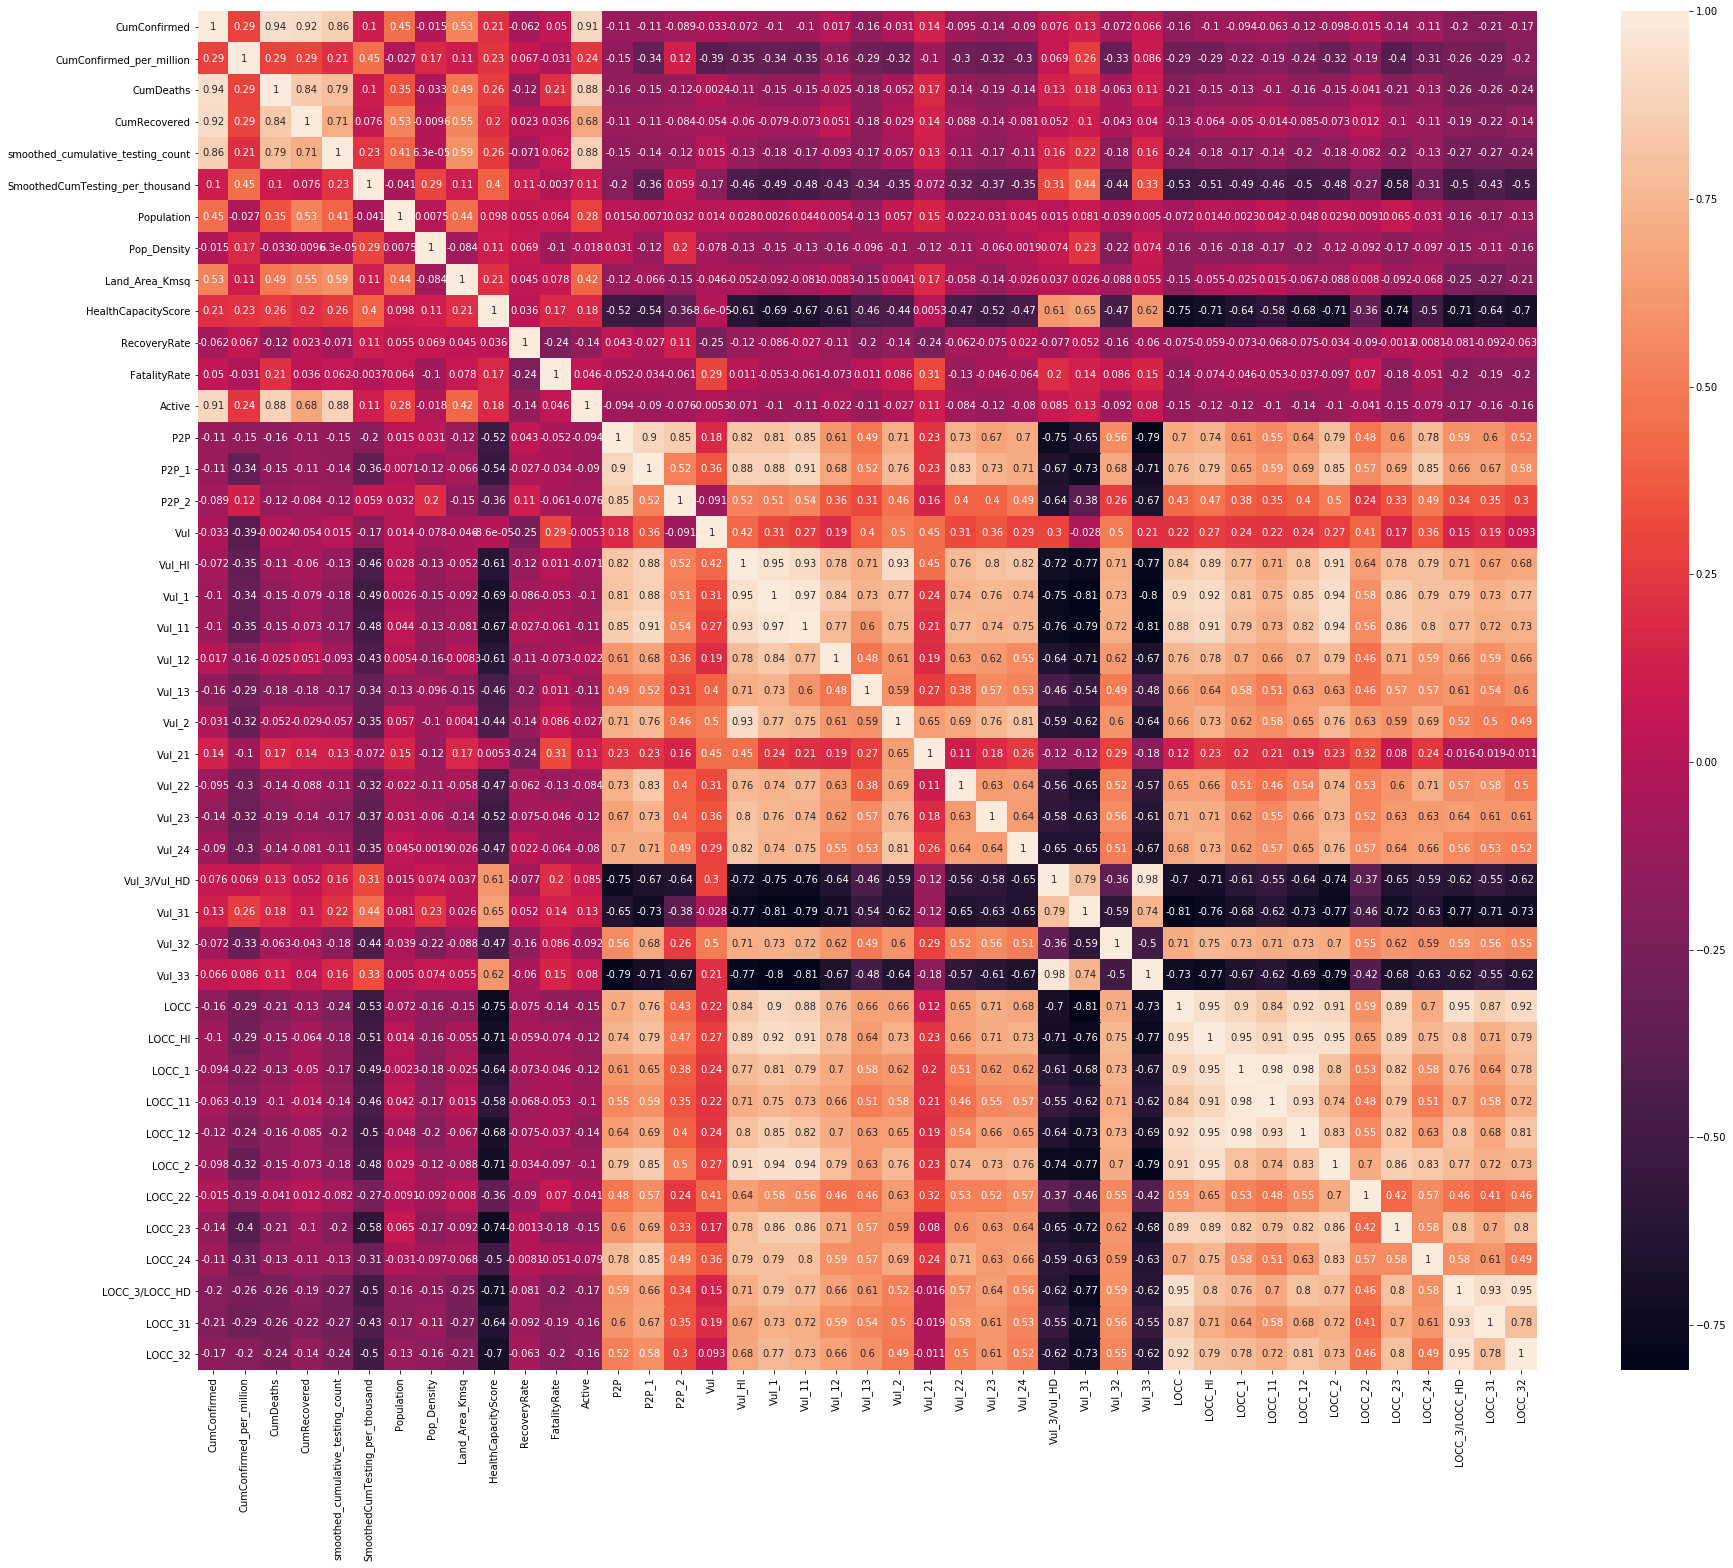

In [94]:
df_final.iloc[:, 2:(len(df_final.columns)-2)] = df_final.iloc[:, 2:(len(df_final.columns)-2)].astype(float)
corrMatrix = df_final.iloc[:, 2:(len(df_final.columns)-2)].corr()
# print (corrMatrix)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25)) 
sn.heatmap(corrMatrix, annot=True)

plt.show()

In [95]:
df_final

,Country,Days,CumConfirmed,CumConfirmed_per_million,CumDeaths,CumRecovered,smoothed_cumulative_testing_count,SmoothedCumTesting_per_thousand,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,FatalityRate,Active,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,Vul_21,Vul_22,Vul_23,Vul_24,Vul_3/Vul_HD,Vul_31,Vul_32,Vul_33,LOCC,LOCC_HI,LOCC_1,LOCC_11,LOCC_12,LOCC_2,LOCC_22,LOCC_23,LOCC_24,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK,COVID-19 RISK CLASS
0,Afghanistan,162,0.066941,0.239889,0.078536,0.111126,0.000000,0.000000,0.270233,0.022024,0.398647,5.574413,7.628866,1.379310,0.024395,6.4,6.0,6.6,6.4,8.2,7.9,8.6,7.7,6.8,8.5,9.7,2.1,7.8,10.00,3.5,2.2,8.4,1.6,7.7,8.3,8.2,8.4,7.9,8.3,7.200000,9.6,7.1,7.00,6.5,7.5,6.8,Very High
1,Albania,166,0.014572,0.708854,0.013893,0.016596,0.000000,0.000000,0.019759,0.039111,0.016730,1.344648,5.257732,1.034483,0.010969,3.6,0.9,5.0,4.1,1.9,2.1,1.9,2.1,2.3,1.7,0.9,0.2,1.8,3.70,5.7,5.4,4.7,6.4,4.9,4.8,5.7,6.5,4.8,3.7,0.066667,7.6,0.2,5.00,5.0,5.0,4.2,Medium
2,Algeria,172,0.072437,0.230411,0.080747,0.114529,0.000000,0.000000,0.304436,0.006076,1.454331,0.913838,7.216495,1.034483,0.030722,4.3,1.4,5.7,3.6,3.0,2.5,3.1,3.3,0.3,3.4,5.4,0.4,0.3,5.90,4.2,4.5,5.8,3.2,3.9,5.2,6.2,6.5,5.9,4.0,1.433333,6.8,1.2,2.25,2.0,2.5,3.9,Medium
3,Angola,141,0.003736,0.015337,0.005330,0.003229,0.000000,0.000000,0.228115,0.009113,0.761256,0.287206,3.917526,1.379310,0.003495,6.5,6.8,6.4,4.3,5.4,5.6,8.1,6.1,0.1,5.2,4.8,5.0,6.3,4.35,3.0,3.7,8.1,0.0,6.2,7.4,7.3,7.4,7.1,7.4,8.266667,9.5,2.7,4.55,4.1,5.0,5.6,High
4,Antigua and Barbuda,141,0.000136,0.236172,0.000170,0.000353,0.000000,0.000000,0.000445,0.083919,0.000268,1.174935,9.793814,1.034483,0.000003,2.8,1.0,3.7,3.4,2.7,2.9,2.5,2.9,3.7,2.4,0.0,0.0,5.8,2.40,4.0,5.4,1.1,4.8,4.9,4.4,5.0,5.0,5.0,3.7,3.000000,6.9,0.5,5.40,5.8,5.0,3.6,Medium
5,Argentina,168,0.594282,1.838161,0.388312,0.974896,0.163039,0.342498,0.313779,0.005696,1.671070,5.939948,7.525773,0.689655,0.240130,2.8,0.4,4.0,3.2,1.6,1.8,1.4,4.4,0.0,1.4,2.8,0.3,1.1,1.40,4.6,5.0,5.4,4.0,4.2,4.0,5.2,5.5,4.9,2.5,2.600000,5.0,0.4,4.30,3.6,5.0,3.4,Low
6,Armenia,162,0.075169,3.548052,0.048199,0.142426,0.000000,0.000000,0.020352,0.038732,0.017384,2.284595,8.659794,0.689655,0.016712,2.7,0.4,3.9,4.4,2.1,2.0,1.5,2.8,2.2,2.1,4.6,0.3,2.0,0.85,6.1,6.2,4.5,6.8,3.8,4.3,5.4,5.8,5.0,3.0,0.633333,7.2,0.3,3.35,1.7,5.0,3.6,Medium
7,Australia,204,0.043751,0.239406,0.028466,0.074404,0.793494,2.954407,0.176934,0.000380,4.690945,8.590078,7.835052,0.689655,0.015833,2.5,0.0,3.8,3.5,1.4,0.5,0.0,2.1,0.0,2.2,5.8,0.1,1.2,0.30,5.1,5.6,3.4,5.6,1.1,1.6,2.1,2.3,1.8,1.0,0.833333,0.0,0.1,0.50,1.0,0.0,2.1,Low
8,Austria,176,0.044531,0.691195,0.041508,0.085510,0.154036,1.623812,0.062340,0.040630,0.050320,4.112272,8.762887,1.034483,0.008450,2.5,0.0,3.8,4.7,1.5,0.3,0.0,1.2,0.1,2.6,7.0,0.1,0.2,0.50,6.8,6.7,3.7,8.4,2.4,1.4,2.2,2.3,2.1,0.6,2.000000,0.0,0.1,3.30,4.1,2.5,3.0,Low
9,Azerbaijan,166,0.061915,0.853663,0.029203,0.130269,0.000000,0.000000,0.070210,0.045946,0.050472,2.741514,9.690722,0.344828,0.004984,4.1,1.3,5.5,3.8,3.2,2.2,2.9,2.4,0.5,4.0,8.1,0.8,1.3,2.70,4.3,5.2,3.1,4.4,3.9,4.5,6.1,7.0,5.2,2.4,0.500000,6.1,0.3,3.35,1.7,5.0,3.9,Medium


In [96]:
X = df_final.iloc[:, 2:(len(df_final. columns)-2)].values
# Leaving Country, Days columns in the beginning and INFORM COVID-19 RISK and COVID-19 RISK CLASS in the end 
X

array([[6.69408224e-02, 2.39889408e-01, 7.85356643e-02, ...,
        7.00000000e+00, 6.50000000e+00, 7.50000000e+00],
       [1.45718397e-02, 7.08854320e-01, 1.38925904e-02, ...,
        5.00000000e+00, 5.00000000e+00, 5.00000000e+00],
       [7.24374658e-02, 2.30411263e-01, 8.07471378e-02, ...,
        2.25000000e+00, 2.00000000e+00, 2.50000000e+00],
       ...,
       [3.33504203e-03, 1.50925440e-02, 3.09606301e-02, ...,
        6.15000000e+00, 4.80000000e+00, 7.50000000e+00],
       [1.90820870e-02, 1.44693276e-01, 1.58205418e-02, ...,
        7.20000000e+00, 6.90000000e+00, 7.50000000e+00],
       [1.02309914e-02, 9.58569767e-02, 8.61907651e-03, ...,
        4.75000000e+00, 4.50000000e+00, 5.00000000e+00]])

<b> Applying PCA  </b> <br>
Since there are lot many correlated variables in our data, it is good to use dimensionality reduction to get more accurate results.

In [97]:
from sklearn.decomposition import PCA

In [98]:
# pca = PCA(0.90)
# X_new = pca.fit_transform(X)
# pca.n_components_

<b> To get the two dimensional projection of the data to 2D, we select the number of principal components to be 2</b> <br>
Looking at the graph we can decide if the classes are well separated using two principal components

In [99]:
pca = PCA(n_components = 2)
X_new = pca.fit_transform(X)

<b> Variance explained by 2 components </b>

In [100]:
explained_variance =  pca.explained_variance_ratio_
# np.round(explained_variance,3)
np.round(sum(explained_variance),3)

0.685

<b> Hierarchical Clustering </b>

<b> Creating Dendogram to choose optimal number of clusters </b>

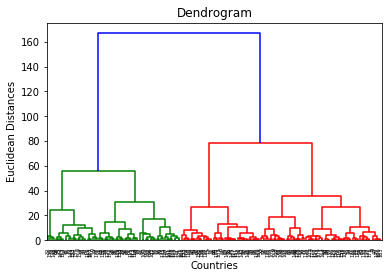

In [101]:
# To do this import scipy library (not whole library but the tools it contains to build our dendogram), open source python 
# library that contains tools to do hierarchical clustering and building programs
import scipy.cluster.hierarchy as sch

# Building Dendogram
dendrogram = sch.dendrogram(sch.linkage(X_new, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distances")
plt.show()

# sch.dendrogram -> sch is object of class scipy.cluster.hierarchy and dendrogram is method from that class
# linkage is the algorithm of hierarchical clustering
# "ward" method tries to minimize the variance within each cluster
# In kmeans clustering we used to try to minimize "within cluster sum of squares", here in hierarchical clustering we try to 
# minimize "within cluster variance"

<b> Optimal number of clusters = 3 </b>

<b> Fitting Hierarchical Clustering to the dataset </b>

In [102]:
# There are two types of hierarchical clustering:
# 1. Agglomerative Hierarchical clustering
# 2. Divisive Hierarchical clustering

# We will use Agglomerative Hierarchical clustering and the class we are going to use to fit hierarchical clustering to our 
# dataset is agglomerative clustering class from scikit learn library

from sklearn.cluster import AgglomerativeClustering

# Preparing Hierarchical clustering algorithm
hc= AgglomerativeClustering(n_clusters=3, 
                            affinity="euclidean", # affinity stands here for distance
                            linkage="ward") # method to minimize variance in each cluster


# Fitting Hierarchical Clustering algorithm to our data while creating the cluster vector that is the vector that tells for each 
# country which cluster the country belongs to, named y_hc
y_hc = hc.fit_predict(X_new)


In [103]:
df_final['Cluster_hc'] = y_hc

<b> Visualize 2-D projection </b>

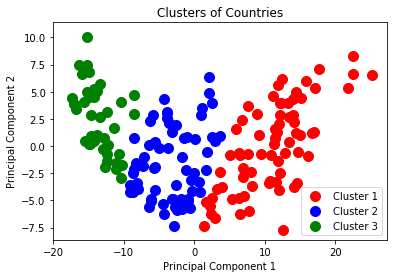

In [104]:
plt.scatter(x=X_new[y_hc==0, 0], y=X_new[y_hc==0, 1], s=100, c="red", label="Cluster 1" )
plt.scatter(x=X_new[y_hc==1, 0], y=X_new[y_hc==1, 1], s=100, c="blue", label="Cluster 2" )
plt.scatter(x=X_new[y_hc==2, 0], y=X_new[y_hc==2, 1], s=100, c="green", label="Cluster 3" )

plt.title("Clusters of Countries")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

<b> Classes seem well separated from each other </b>

<b> Exploring the clusters </b>

In [105]:
# df_final[df_final["Cluster_hc"]==0].describe()
# df_final[df_final["Cluster_hc"]==0]
df_final[df_final["Cluster_hc"]==0].shape

(71, 48)

In [106]:
# df_final[df_final["Cluster_hc"]==1].describe()
# df_final[df_final["Cluster_hc"]==1]
df_final[df_final["Cluster_hc"]==1].shape

(65, 48)

In [107]:
# df_final[df_final["Cluster_hc"]==2].describe()
# df_final[df_final["Cluster_hc"]==2]
df_final[df_final["Cluster_hc"]==2].shape

(42, 48)

In [108]:
df_final.dtypes
# df_final.iloc[:, 1:34] = df_final.iloc[:, 1:34].astype(float)

Country                               object
Days                                  object
CumConfirmed                         float64
CumConfirmed_per_million             float64
CumDeaths                            float64
CumRecovered                         float64
smoothed_cumulative_testing_count    float64
SmoothedCumTesting_per_thousand      float64
Population                           float64
Pop_Density                          float64
Land_Area_Kmsq                       float64
HealthCapacityScore                  float64
RecoveryRate                         float64
FatalityRate                         float64
Active                               float64
P2P                                  float64
P2P_1                                float64
P2P_2                                float64
Vul                                  float64
Vul_HI                               float64
Vul_1                                float64
Vul_11                               float64
Vul_12    

<b> Summarizing each cluster by taking mean of each variable for all countries under that cluster</b>

In [109]:
df_final1 = df_final.groupby("Cluster_hc").mean()
df_final1

,CumConfirmed,CumConfirmed_per_million,CumDeaths,CumRecovered,smoothed_cumulative_testing_count,SmoothedCumTesting_per_thousand,Population,Pop_Density,Land_Area_Kmsq,HealthCapacityScore,RecoveryRate,FatalityRate,Active,P2P,P2P_1,P2P_2,Vul,Vul_HI,Vul_1,Vul_11,Vul_12,Vul_13,Vul_2,Vul_21,Vul_22,Vul_23,Vul_24,Vul_3/Vul_HD,Vul_31,Vul_32,Vul_33,LOCC,LOCC_HI,LOCC_1,LOCC_11,LOCC_12,LOCC_2,LOCC_22,LOCC_23,LOCC_24,LOCC_3/LOCC_HD,LOCC_31,LOCC_32,INFORM COVID-19 RISK
Cluster_hc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.041986,0.334779,0.030098,0.066305,0.018221,0.038401,0.181902,0.043197,0.262881,1.255286,7.010309,0.874211,0.018723,5.732394,5.636620,5.773239,4.591549,5.638028,6.012676,7.535211,5.678873,3.253521,5.133803,4.652113,3.804225,5.350704,5.209155,3.143662,3.523944,6.508451,1.245070,6.487324,6.759155,6.945070,7.040845,6.804225,6.463380,3.909155,9.312676,3.915493,6.059155,5.604225,6.514085,5.508451
1,0.311980,1.158361,0.319195,0.537694,0.168240,0.462583,0.488140,0.076622,0.454058,3.145210,7.467090,0.763926,0.101649,3.456923,0.986154,4.689231,4.046154,2.660000,2.758462,2.880000,3.795385,1.409231,2.484615,3.518462,0.824615,2.215385,2.190000,5.092308,5.584615,4.803077,4.966154,4.269231,4.580000,5.349231,5.676923,4.966154,3.615385,1.657949,6.530769,0.636923,3.867692,3.389231,4.346154,3.850769
2,0.397803,1.234325,0.522904,0.416860,0.634065,2.139427,0.212542,0.139015,0.722544,6.496332,7.125675,1.395731,0.317061,2.923810,0.138095,4.326190,4.469048,1.333333,0.614286,0.311905,1.585714,0.235714,1.957143,4.195238,0.278571,1.161905,1.130952,6.492857,6.969048,4.050000,7.457143,1.811905,2.180952,2.878571,3.221429,2.492857,1.359524,1.105159,1.071429,0.114286,1.391667,1.676190,1.107143,2.747619


In [110]:
df_final1.rename(columns={
                'P2P': 'Risk of Transmission from Person to Person',
    
                'P2P_1': 'Risk due to lack of basic sanitation and water services',
                'P2P_2': 'Risk associated to Population Distribution', 
                                
                'Vul': 'Vulnerability Index',
    
                'Vul_HI': 'Vulnerability (Hazard-independent) Risk Index',
                'Vul_1':  'INFORM Socio-Economic Vulnerability Risk Index',
                'Vul_11': 'Vulnerability related to Development & Deprivation', 
                'Vul_12': 'Vulnerability due to Economic and Gender Inequality',
                'Vul_13': 'Vulnerability associated to Economic Dependency Index',
                
                'Vul_2':  'INFORM Vulnerable Groups Risk Index',
                'Vul_21': 'Vulnerability associated with Uprooted people',
                'Vul_22': 'Vulnerability due to other Health Conditions',
                'Vul_23': 'Vulnerability due to lack of Food Security',
                'Vul_24': 'Vulnerability due to Gender Based Violence',   
    
                'Vul_3/Vul_HD':'Covid-19 Overall Vulnerability Index',
                'Vul_31': 'Covid-19-Vulnerability related to International and Internal Movements',
                'Vul_32': 'Covid-19-Vulnerability due to lack of access to authentic information and trust on Politicians',
                'Vul_33': 'Covid-19-Vulnerability due to proportion of 1+ underlying conditions plus 0 conditions (65+ yrs) population',                 

                'LOCC': "Lack of Coping Capacity Index",
                
                'LOCC_HI':'Lack of Coping Capacity (Hazard-independent) Index',
    
                'LOCC_1': 'INFORM Risk Index related to Institutional Strength',
                'LOCC_11': 'Risk based on Corruption Perception Index',
                'LOCC_12': 'Risk based on Government Effectiveness',
                
                'LOCC_2':'INFORM Risk Index based on limited operational Infrastructure',
                'LOCC_22': 'Risk associated to Immunization coverage',
                'LOCC_23': 'Risk based on per capita public and private expenditure on health care',
                'LOCC_24': 'Risk based on Maternal Mortality ratio',            
                
                'LOCC_3/LOCC_HD': 'Covid-19 Overall Lack of coping capacity Index',
                'LOCC_31': 'Covid-19-Risk based on International Health Regulations core capacity scores',
                'LOCC_32': 'Covid-19-Risk based on  Operational readiness index',
    
    
    
                'CumConfirmed': 'Cumulative Confirmed Count', 'CumDeaths': 'Cumulative Death Count', 
                'CumRecovered': 'Cumulative Recovered Count',
                'smoothed_cumulative_testing_count': 'Smoothed Cumulative Testing Count', 
                'CumConfirmed_per_million': 'Cumulative Confirmed per million',
                'SmoothedCumTesting_per_thousand': 'Smoothed Cumulative Testing per thousand',
                'SmoothedCumTesting_per_CumConfirmed': 'Cumulative Testing per Cumulatve Confirmed Ratio', 
                'Pop_Density': 'Population Density',
                'Land_Area_Kmsq': 'Land Area (Kmsq)', 
                'HealthCapacityScore': 'Health Capacity Score', 
                'RecoveryRate':'Recovery Rate', 
                'FatalityRate':'Fatality Rate',
                }, inplace = True)

In [111]:
df_final1.head()

,Cumulative Confirmed Count,Cumulative Confirmed per million,Cumulative Death Count,Cumulative Recovered Count,Smoothed Cumulative Testing Count,Smoothed Cumulative Testing per thousand,Population,Population Density,Land Area (Kmsq),Health Capacity Score,Recovery Rate,Fatality Rate,Active,Risk of Transmission from Person to Person,Risk due to lack of basic sanitation and water services,Risk associated to Population Distribution,Vulnerability Index,Vulnerability (Hazard-independent) Risk Index,INFORM Socio-Economic Vulnerability Risk Index,Vulnerability related to Development & Deprivation,Vulnerability due to Economic and Gender Inequality,Vulnerability associated to Economic Dependency Index,INFORM Vulnerable Groups Risk Index,Vulnerability associated with Uprooted people,Vulnerability due to other Health Conditions,Vulnerability due to lack of Food Security,Vulnerability due to Gender Based Violence,Covid-19 Overall Vulnerability Index,Covid-19-Vulnerability related to International and Internal Movements,Covid-19-Vulnerability due to lack of access to authentic information and trust on Politicians,Covid-19-Vulnerability due to proportion of 1+ underlying conditions plus 0 conditions (65+ yrs) population,Lack of Coping Capacity Index,Lack of Coping Capacity (Hazard-independent) Index,INFORM Risk Index related to Institutional Strength,Risk based on Corruption Perception Index,Risk based on Government Effectiveness,INFORM Risk Index based on limited operational Infrastructure,Risk associated to Immunization coverage,Risk based on per capita public and private expenditure on health care,Risk based on Maternal Mortality ratio,Covid-19 Overall Lack of coping capacity Index,Covid-19-Risk based on International Health Regulations core capacity scores,Covid-19-Risk based on Operational readiness index,INFORM COVID-19 RISK
Cluster_hc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.041986,0.334779,0.030098,0.066305,0.018221,0.038401,0.181902,0.043197,0.262881,1.255286,7.010309,0.874211,0.018723,5.732394,5.636620,5.773239,4.591549,5.638028,6.012676,7.535211,5.678873,3.253521,5.133803,4.652113,3.804225,5.350704,5.209155,3.143662,3.523944,6.508451,1.245070,6.487324,6.759155,6.945070,7.040845,6.804225,6.463380,3.909155,9.312676,3.915493,6.059155,5.604225,6.514085,5.508451
1,0.311980,1.158361,0.319195,0.537694,0.168240,0.462583,0.488140,0.076622,0.454058,3.145210,7.467090,0.763926,0.101649,3.456923,0.986154,4.689231,4.046154,2.660000,2.758462,2.880000,3.795385,1.409231,2.484615,3.518462,0.824615,2.215385,2.190000,5.092308,5.584615,4.803077,4.966154,4.269231,4.580000,5.349231,5.676923,4.966154,3.615385,1.657949,6.530769,0.636923,3.867692,3.389231,4.346154,3.850769
2,0.397803,1.234325,0.522904,0.416860,0.634065,2.139427,0.212542,0.139015,0.722544,6.496332,7.125675,1.395731,0.317061,2.923810,0.138095,4.326190,4.469048,1.333333,0.614286,0.311905,1.585714,0.235714,1.957143,4.195238,0.278571,1.161905,1.130952,6.492857,6.969048,4.050000,7.457143,1.811905,2.180952,2.878571,3.221429,2.492857,1.359524,1.105159,1.071429,0.114286,1.391667,1.676190,1.107143,2.747619


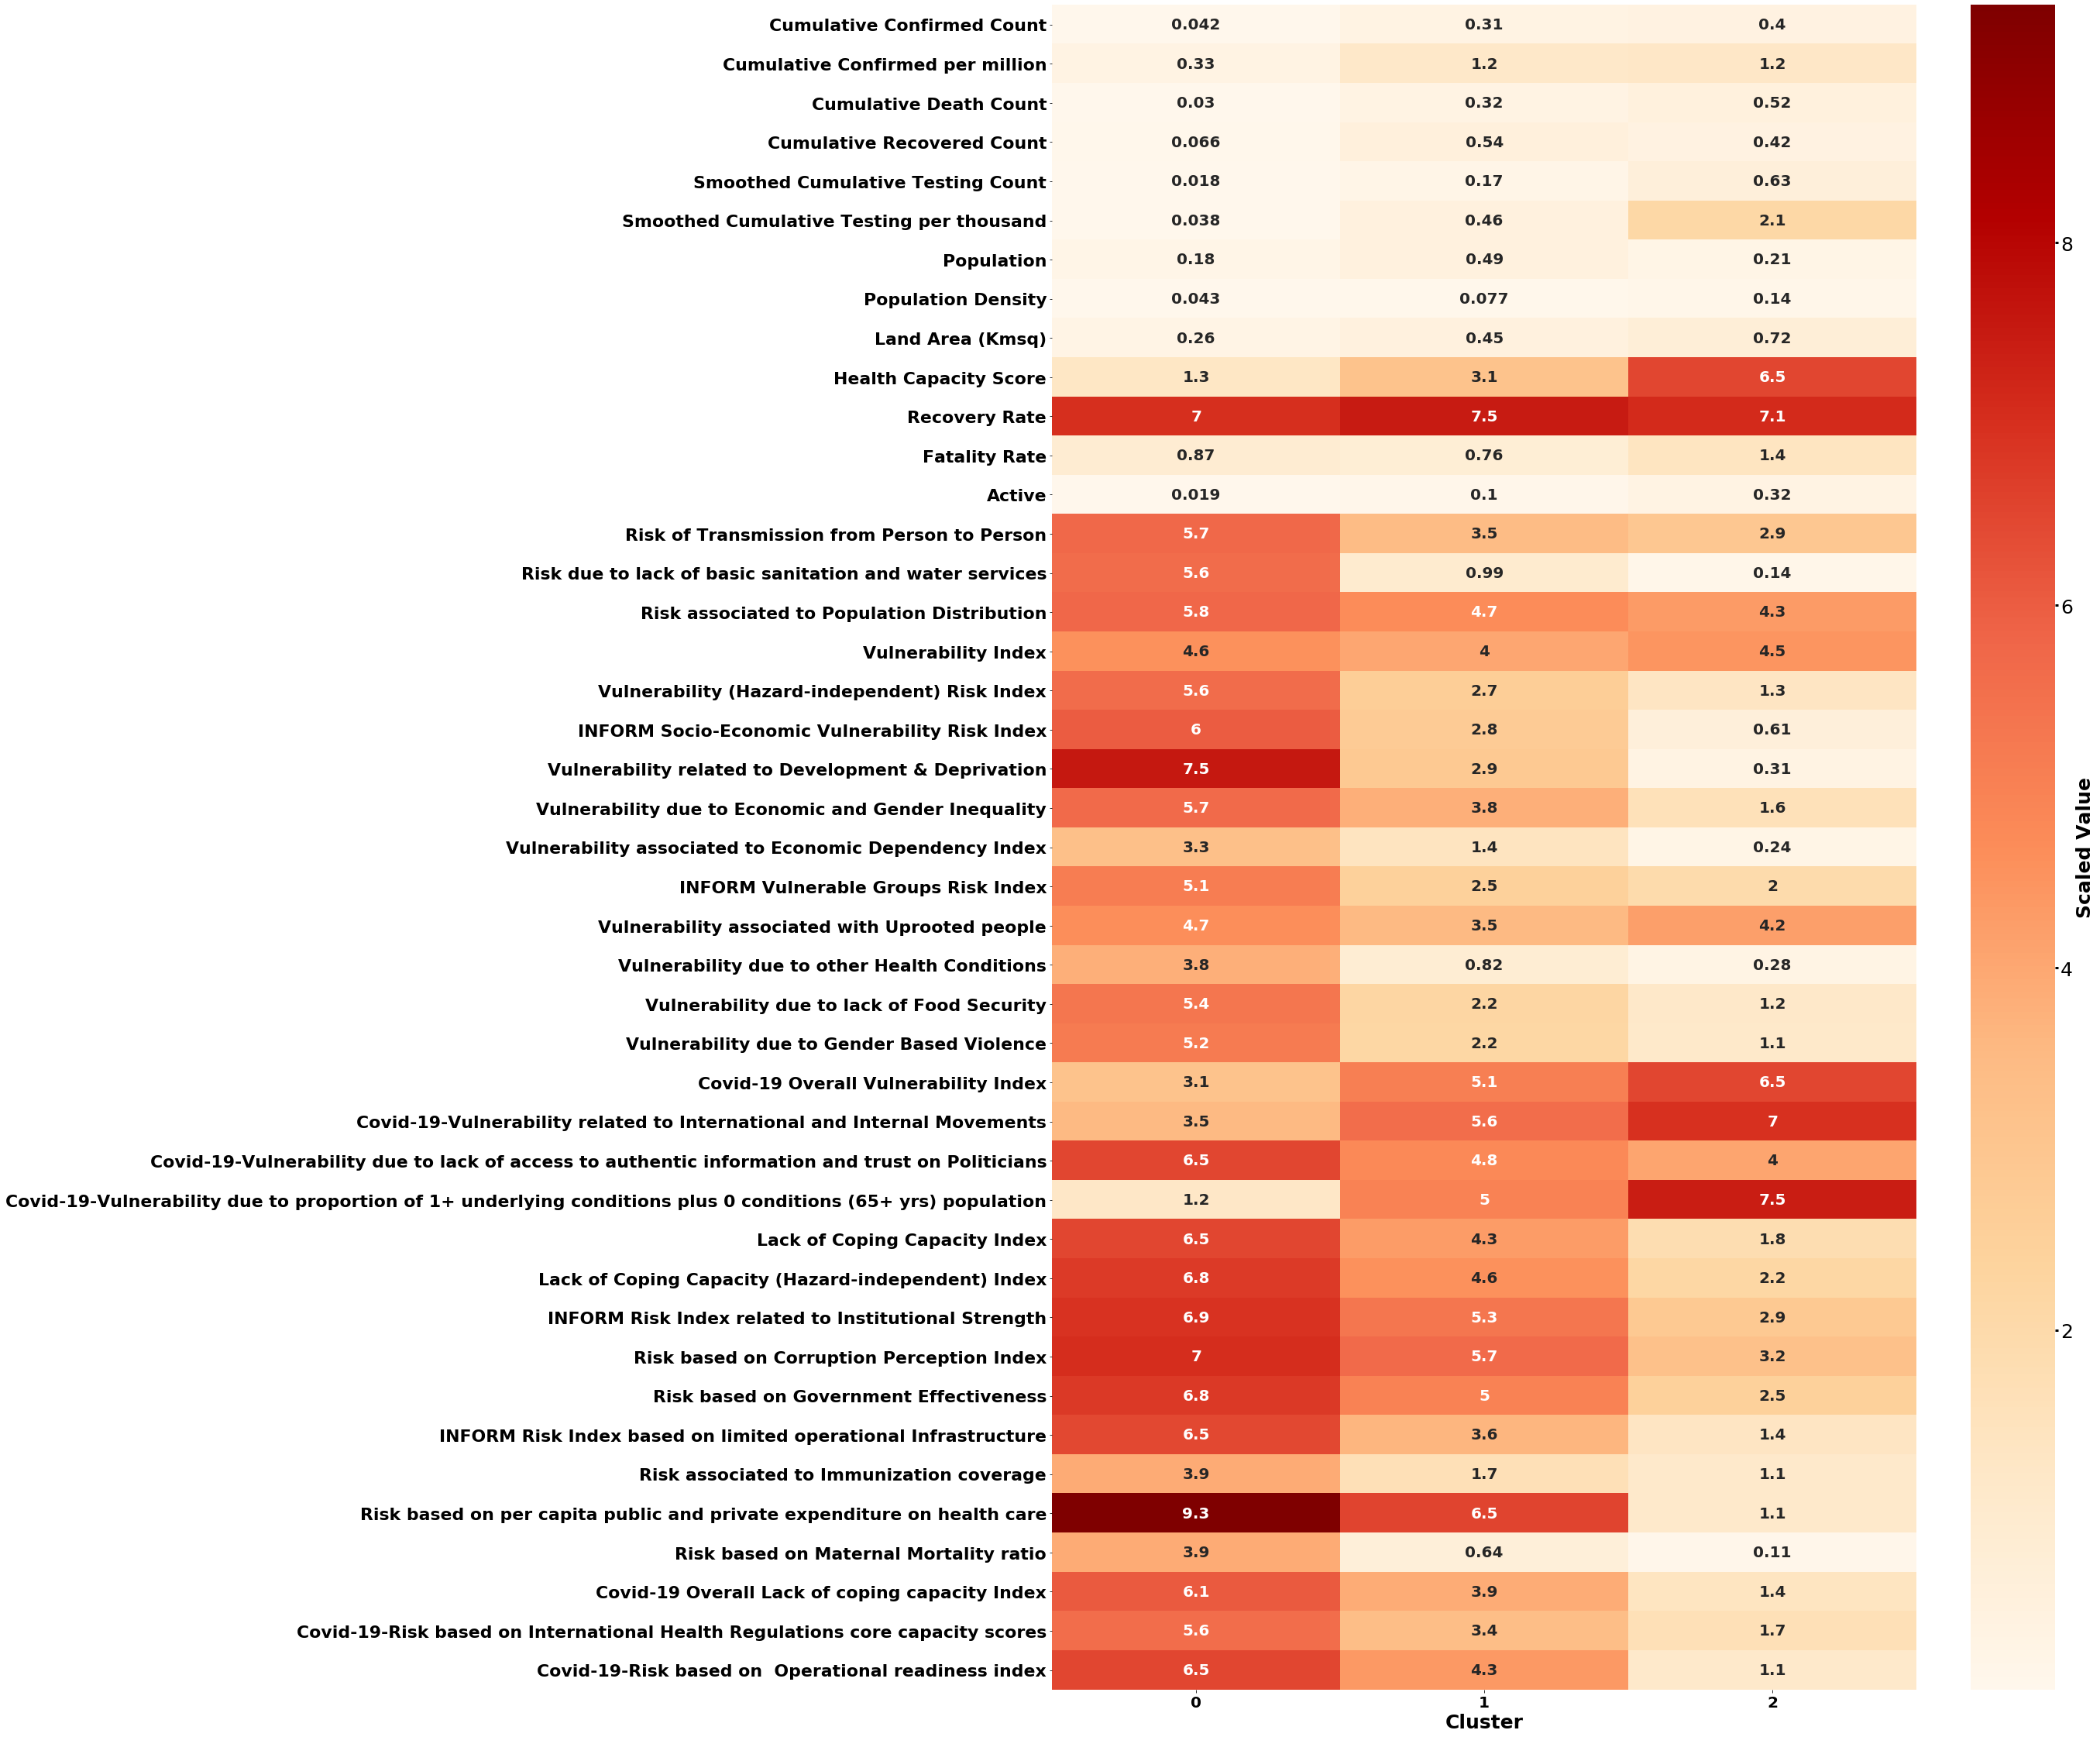

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
df_final1_transposed = df_final1.transpose()
plt.figure(figsize=(25,40)) 
heatmap2 = sns.heatmap(df_final1_transposed.iloc[0:(len(df_final1.transpose())-1), :],xticklabels=1, annot=True, yticklabels=1, 
                     annot_kws={"size": 20, "weight":"bold"}, 
                     cmap="OrRd")
_,ylabels = plt.yticks()
heatmap2.set_yticklabels(ylabels, size=22, fontweight = "bold")
_,xlabels = plt.xticks()
heatmap2.set_xticklabels(xlabels, size=20, fontweight = "bold")
heatmap2.set_xlabel("Cluster",fontsize=25, fontweight = "bold")
# heatmap2.figure.axes[-1].set_ylabel('Value', size=30, yticklabels=20)
cbar = heatmap2.collections[0].colorbar
cbar.ax.tick_params(labelsize=25, width=3, length =4)
cbar.set_label(label='Scaled Value',weight='bold', size = 25)

# heatmap2.invert_yaxis()
heatmap2

In [10]:
# ! conda install -c r r-essentials
# ! conda install -c r rpy2
import os
os.environ['R_HOME'] = "C:/Users/user/anaconda3/Lib/R"
os.environ['R_USER'] = "C:/Users/user/anaconda3/pkgs/rpy2-2.9.4-py37r36h39e3cac_0/Lib/site-packages/rpy2"
import rpy2.robjects as robjects

In [11]:
# %load_ext rpy2.ipython

C:\Users\user\anaconda3\lib\site-packages\rpy2\robjects\pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


In [38]:
%%R

# Load the kohonen package 
# install.packages(c("kohonen", "viridis"),repos='http://cran.us.r-project.org')
library(kohonen)
library(viridis)
library(dplyr)

In [39]:
%%R
# coolBlueHotRed <- function(n, alpha = 1) {
#  rainbow(n, end=4/6, alpha=alpha)[n:1]}

# Define color Palettes
vircols <- function(n, alpha = 1) {
  viridis(n,alpha=alpha ,begin=0.2,end=0.97)[n:1]}

pretty_palette <- c("#1f77b4","#ff7f0e","#2ca02c",
                    "#d62728","#9467bd","#8c564b",
                    "#e377c2")

In [40]:
%%R
# Reading data set (rows are samples, columns are variables
data <- read.csv("C:/Users/user/Downloads/COVID-19 Related Info/df_final_renamed.csv")
head(data)
colnames(data)
#sum(is.nan(data))
sapply(data, class)

In [41]:
%%R
# Filtering/Selecting columns for clustering
data_f <- data %>% select(4:(ncol(data)-2))
head(data_f)
# sapply(data_f, class)

In [42]:
%%R

# Change the data frame with training data to a 
# matrix. Also center and scale all variables (if
# not already) to give them equal importance 
# during the SOM training process. 

data_f_matrix <- as.matrix(data_f)

In [43]:
%%R

# Select the size and type of the map
set.seed(100)
som_grid <- somgrid(xdim = 7, ydim=7, 
                    topo="hexagonal")

# Train the SOM, using options for the number of 
# iterations,the learning rates

som_model <- som(data_f_matrix, 
                 grid=som_grid, 
                 rlen=500, 
                 alpha=c(0.05,0.01), 
                 keep.data = TRUE)

In [58]:
%%R
# To know our data position in maps, we look it 
# in unit.classif. Each values represent the node 
# number to which the country belongs

som_model$unit.classif

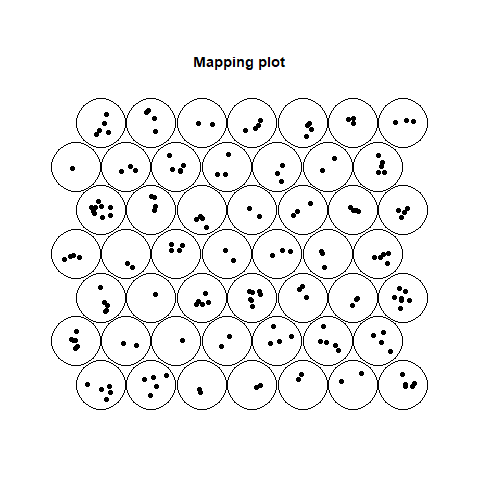

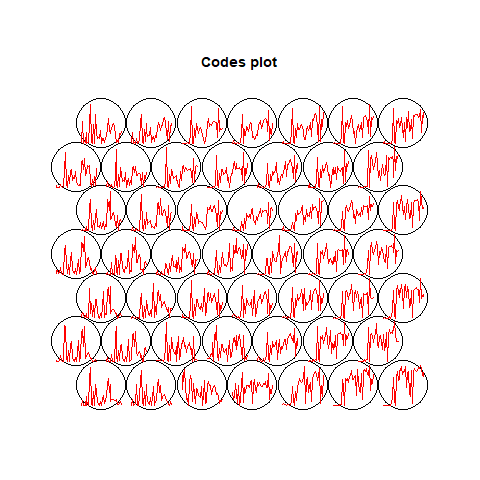

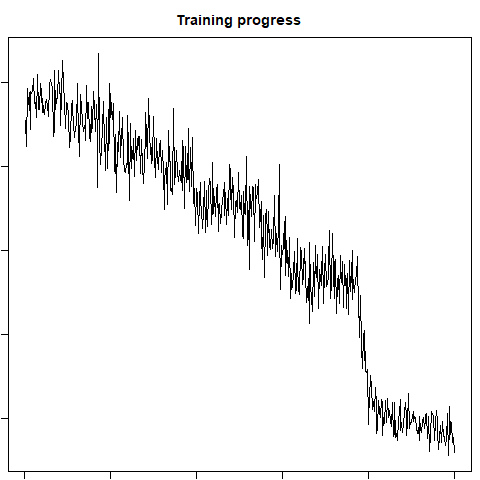

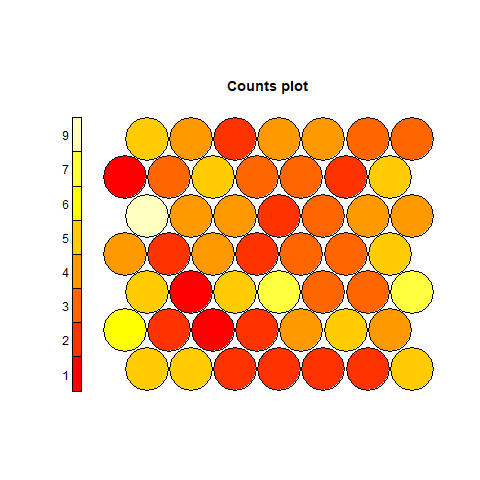

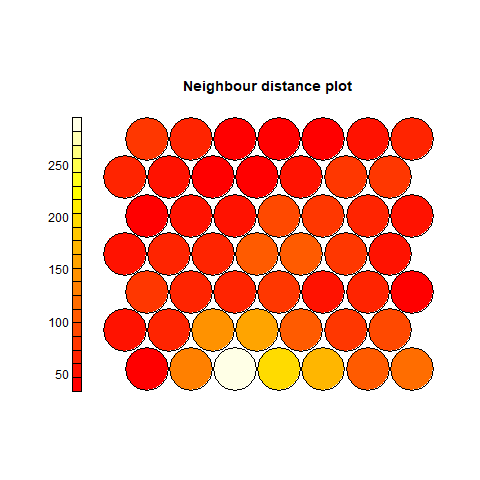

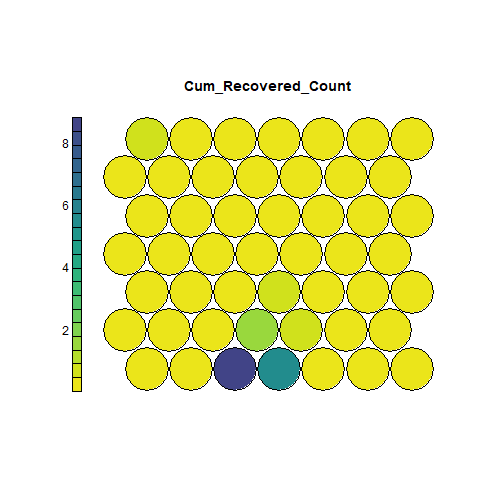

In [45]:
%%R

# We can see the classification of each node by 
# codes plot and we can see the values of each 
# node using the mapping plot

par("mar")
# par(mar = c(1,1,1,1))
# par(oma = c(0, 0, 1, 0))
plot(som_model, type = "mapping", pchs = 19, 
     shape = "round")
plot(som_model, type="codes")

# As the SOM training iterations progress, the 
# distance from each node's weights to the samples
# represented by that node is reduced. Ideally, 
# this distance should reach a minimum plateau. 
# This plot option shows the progress over time.
# If the curve is continually decreasing, more 
# iterations are required.

plot(som_model, type="changes")

# The Kohonen packages allows us to visualise the 
# count of how many samples are mapped to each 
# node on the map. This metric can be used as a 
# measure of map quality - ideally the sample 
# distribution is relatively uniform. Large values
# in some map areas suggests that a larger map 
# would be benificial. Empty nodes indicate that 
# your map size is too big for the number of samples. 
# Aim for at least 5-10 samples per node when 
# choosing map size. 

plot(som_model, type="count")

# Often referred to as the "U-Matrix", this 
# visualisation is of the distance between each 
# node and its neighbours. Typically viewed with 
# a grayscale palette, areas of low neighbour 
# distance indicate groups of nodes that are 
# similar. Areas with large distances indicate 
# the nodes are much more dissimilar - and 
# indicate natural boundaries between node 
# clusters. The U-Matrix can be used to identify 
# clusters within the SOM map. 

plot(som_model, type="dist.neighbours")

# SOM heatmap visualisation of the distribution 
# of a single variable across the map (here column 4)

plot(som_model, type = "property", 
     property = getCodes(som_model)[,4], 
     main=colnames(getCodes(som_model))[4], 
     palette.name=vircols) 


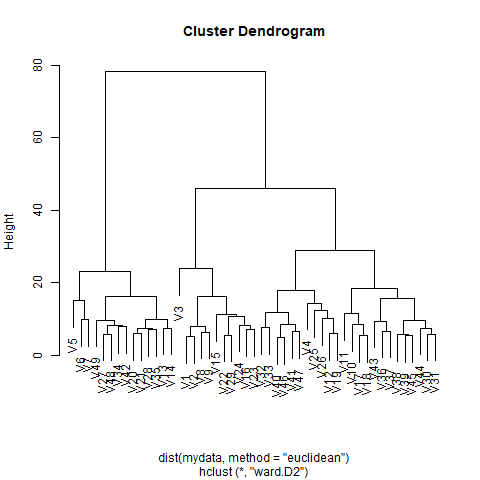

In [46]:
%%R

# CLUSTERING

# Performing clustering on SOM nodes to isolate 
# groups of samples with similar metrics.

# Clustering SOM map using hierachical clustering.
# The results of the clustering can be visualised 
# using the SOM plot function.

mydata <- as.data.frame(som_model$codes)
lapply(mydata, as.numeric)
dendrogram <- hclust(dist(mydata, 
                          method = "euclidean"), 
                     method ="ward.D2")

plot(dendrogram)

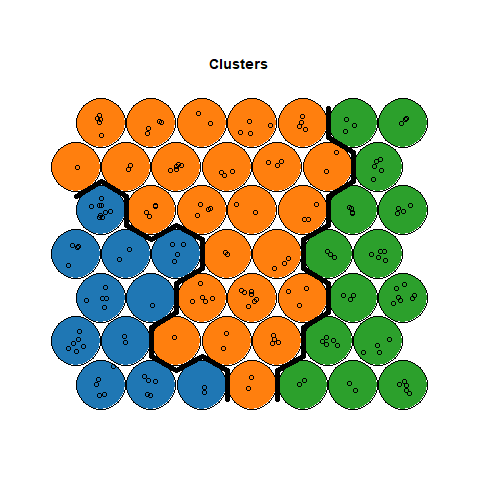

In [47]:
%%R

som_cluster <- cutree(dendrogram, 3)

# Plot these results:
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters") 
add.cluster.boundaries(som_model, som_cluster)

# Mapping clusters back to original samples
# Get vector with cluster value for each original 
# data sample
cluster_assignment <- som_cluster[som_model$unit.classif]

# For each of analysis, add the assignment as a 
# column in the original data:
data$cluster <- cluster_assignment

# Exploring clusters
c1 <- data[data$cluster==1,]
c2 <- data[data$cluster==2,]
c3 <- data[data$cluster==3,]
#c4 <- data[data$cluster==4,]

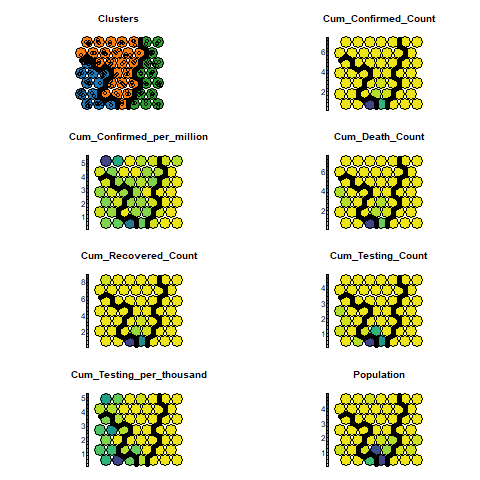

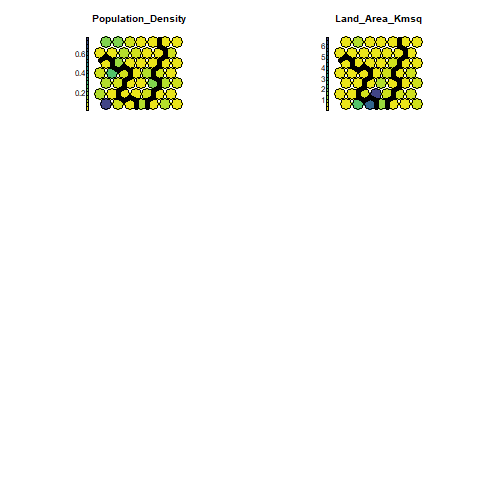

In [60]:
%%R

# par("mar")
par(mfrow=c(4,2))
par(mar = c(1, 1, 0.1, 1))
par(oma = c(0, 0, 0.5, 0))
par(xpd=NA)
#windows.options(width=10, height=10)
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters", cex.main=0.20) 
add.cluster.boundaries(som_model, som_cluster)

for (i in 1:9) {
  plot(som_model, type = "property", 
       property = getCodes(som_model)[,i], 
       main=colnames(getCodes(som_model))[i], 
       palette.name=vircols)
  add.cluster.boundaries(som_model, som_cluster)
  
}

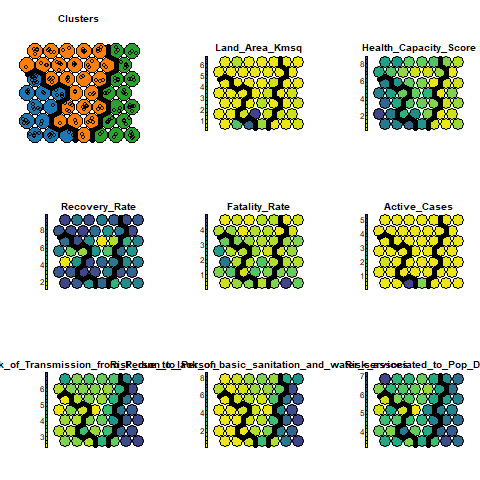

In [49]:
%%R

par(mfrow=c(3, 3))
par(mar = c(1, 1, 0.1, 1))
par(oma = c(0, 0, 0.5, 0))
par(xpd=NA)
#windows.options(width=10, height=10)
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters", cex.main=0.20) 
add.cluster.boundaries(som_model, som_cluster)

for (i in 9:16) {
  plot(som_model, type = "property", 
       property = getCodes(som_model)[,i], 
       main=colnames(getCodes(som_model))[i], 
       palette.name=vircols)
  add.cluster.boundaries(som_model, som_cluster)
}

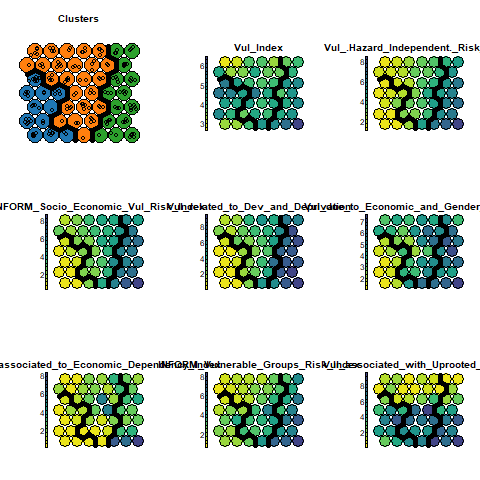

In [50]:
%%R

par(mfrow=c(3, 3))
par(mar = c(1, 1, 0.1, 1))
par(oma = c(0, 0, 0.5, 0))
par(xpd=NA)
#windows.options(width=10, height=10)
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters", cex.main=0.20) 
add.cluster.boundaries(som_model, som_cluster)

for (i in 17:24) {
  plot(som_model, type = "property", 
       property = getCodes(som_model)[,i], 
       main=colnames(getCodes(som_model))[i], 
       palette.name=vircols)
  add.cluster.boundaries(som_model, som_cluster)
  
}

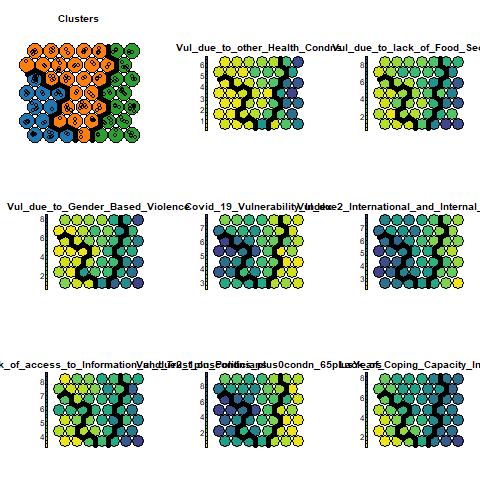

In [51]:
%%R

par(mfrow=c(3, 3))
par(mar = c(1, 1, 0.1, 1))
par(oma = c(0, 0, 0.5, 0))
par(xpd=NA)
#windows.options(width=10, height=10)
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters", cex.main=0.20) 
add.cluster.boundaries(som_model, som_cluster)

for (i in 25:32) {
  plot(som_model, type = "property", 
       property = getCodes(som_model)[,i], 
       main=colnames(getCodes(som_model))[i], 
       palette.name=vircols)
  add.cluster.boundaries(som_model, som_cluster)
  
}

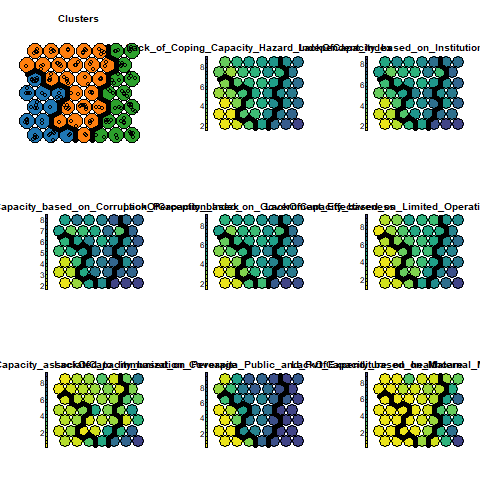

In [52]:
%%R

par(mfrow=c(3, 3))
par(mar = c(1, 1, 0.1, 1))
par(oma = c(0, 0, 0.5, 0))
par(xpd=NA)
#windows.options(width=10, height=10)
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters", cex.main=0.20) 
add.cluster.boundaries(som_model, som_cluster)

for (i in 33: 40) {
  plot(som_model, type = "property", 
       property = getCodes(som_model)[,i], 
       main=colnames(getCodes(som_model))[i], 
       palette.name=vircols)
  add.cluster.boundaries(som_model, som_cluster)
}

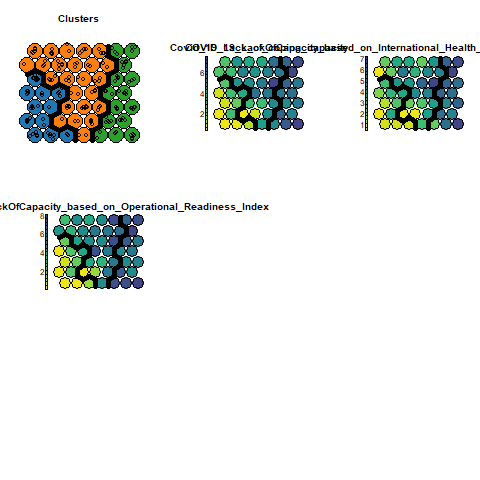

In [53]:
%%R

par(mfrow=c(3, 3))
par(mar = c(1, 1, 0.1, 1))
par(oma = c(0, 0, 0.5, 0))
par(xpd=NA)
#windows.options(width=10, height=10)
plot(som_model, type="mapping", 
     bgcol = pretty_palette[som_cluster], 
     main = "Clusters", cex.main=0.20) 
add.cluster.boundaries(som_model, som_cluster)

for (i in 41:43) {
  plot(som_model, type = "property", 
       property = getCodes(som_model)[,i], 
       main=colnames(getCodes(som_model))[i], 
       palette.name=vircols)
  add.cluster.boundaries(som_model, som_cluster)
}